# Analyzing Student Dropouts

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import Helper
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

## Loading and exploring the data

### Fetching data from UCI ML Repos

In [4]:
#incorrect repo call to correct API issue
fetch_ucirepo(name='test')

DatasetNotFoundError: "test" dataset (id=182) exists in the repository, but is not available for import. Please select a dataset from this list: https://archive.ics.uci.edu/datasets?skip=0&take=10&sort=desc&orderBy=NumHits&search=&Python=true

In [5]:
# fetch dataset
predict_students_dropout_and_academic_success = fetch_ucirepo(name="Predict Students' Dropout and Academic Success")

In [6]:
# Get the original dataset
student_data = predict_students_dropout_and_academic_success.data.original.copy()

# metadata
meta_data = predict_students_dropout_and_academic_success.variables

student_data.head()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [7]:
student_data.dtypes

Marital Status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [8]:
meta_data

,name,role,type,demographic,description,units,missing_values
0,Marital Status,Feature,Integer,Marital Status,1 – single 2 – married 3 – widower 4 – divorce...,None,no
1,Application mode,Feature,Integer,None,1 - 1st phase - general contingent 2 - Ordinan...,None,no
2,Application order,Feature,Integer,None,Application order (between 0 - first choice; a...,None,no
3,Course,Feature,Integer,None,33 - Biofuel Production Technologies 171 - Ani...,None,no
4,Daytime/evening attendance,Feature,Integer,None,1 – daytime 0 - evening,None,no
5,Previous qualification,Feature,Integer,Education Level,1 - Secondary education 2 - Higher education -...,None,no
6,Previous qualification (grade),Feature,Continuous,None,Grade of previous qualification (between 0 and...,None,no
7,Nacionality,Feature,Integer,Nationality,1 - Portuguese; 2 - German; 6 - Spanish; 11 - ...,None,no
8,Mother's qualification,Feature,Integer,Education Level,1 - Secondary Education - 12th Year of Schooli...,None,no
9,Father's qualification,Feature,Integer,Education Level,1 - Secondary Education - 12th Year of Schooli...,None,no


The above dataframe is the metadata for our dataset and explains every feature.

### Exploring the data

In [9]:
explore_data = student_data.copy()

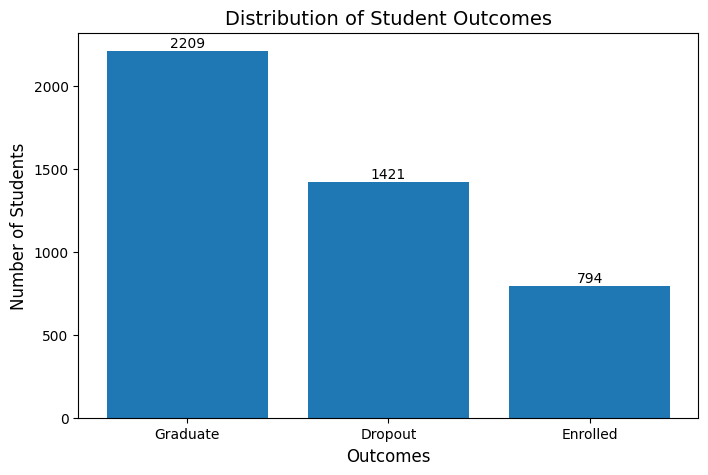

In [10]:
target_counts = explore_data["Target"].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(target_counts.index, target_counts.values)
plt.xlabel("Outcomes", fontsize=12)
plt.ylabel("Number of Students", fontsize=12)
plt.title("Distribution of Student Outcomes", fontsize=14)
plt.xticks(rotation=0, ha="center")
for i, count in enumerate(target_counts.values):
    plt.text(i, count + 5, str(count), ha="center", va="bottom", fontsize=10)

plt.show()

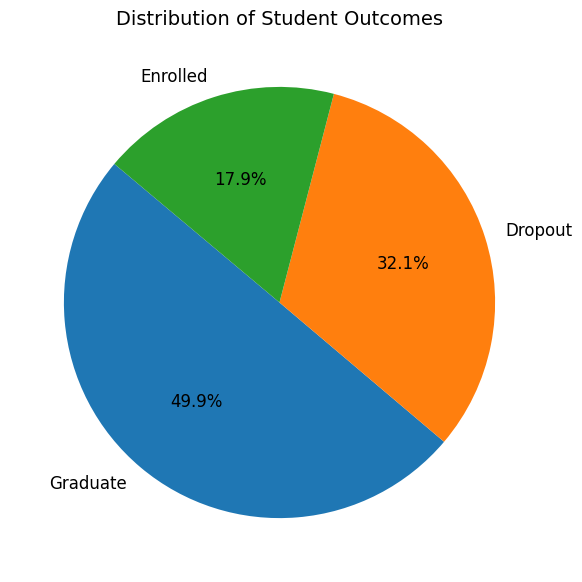

In [11]:
plt.figure(figsize=(7, 7))
plt.pie(
    target_counts.values,
    labels=target_counts.index,
    autopct=lambda p: "{:.1f}%".format(p),
    startangle=140, 
    textprops={"fontsize": 12},
)
plt.title("Distribution of Student Outcomes", fontsize=14)
plt.show()

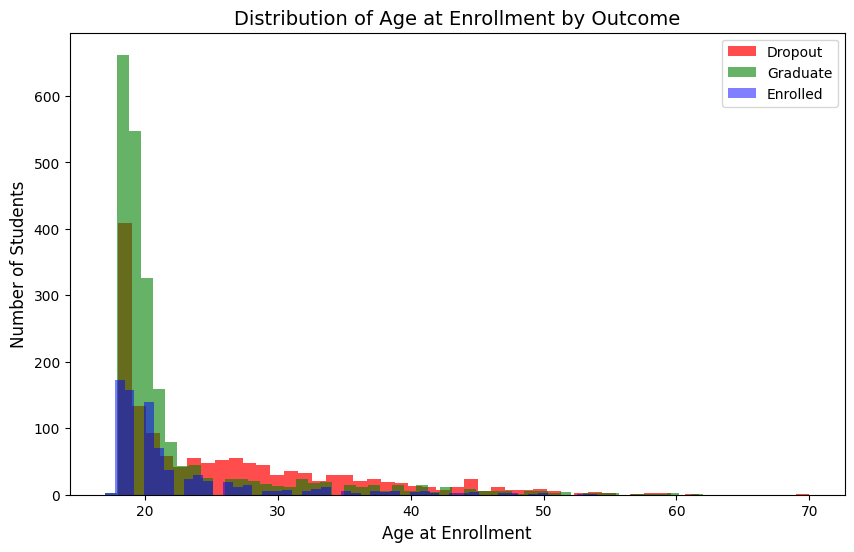

In [12]:
dropout_data = explore_data[explore_data["Target"] == "Dropout"]
graduate_data = explore_data[explore_data["Target"] == "Graduate"]
enrolled_data = explore_data[explore_data["Target"] == "Enrolled"]

plt.figure(figsize=(10, 6))
plt.hist(
    dropout_data["Age at enrollment"],
    bins=50,  # Adjust bin number as needed
    alpha=0.7,
    label="Dropout",
    color="red",
)
plt.hist(
    graduate_data["Age at enrollment"],
    bins=50,
    alpha=0.6,
    label="Graduate",
    color="green",
)
plt.hist(
    enrolled_data["Age at enrollment"],
    bins=50,
    alpha=0.5, 
    label="Enrolled",
    color="blue",
)

plt.xlabel("Age at Enrollment", fontsize=12)
plt.ylabel("Number of Students", fontsize=12)
plt.title("Distribution of Age at Enrollment by Outcome", fontsize=14)
plt.legend()
plt.show()

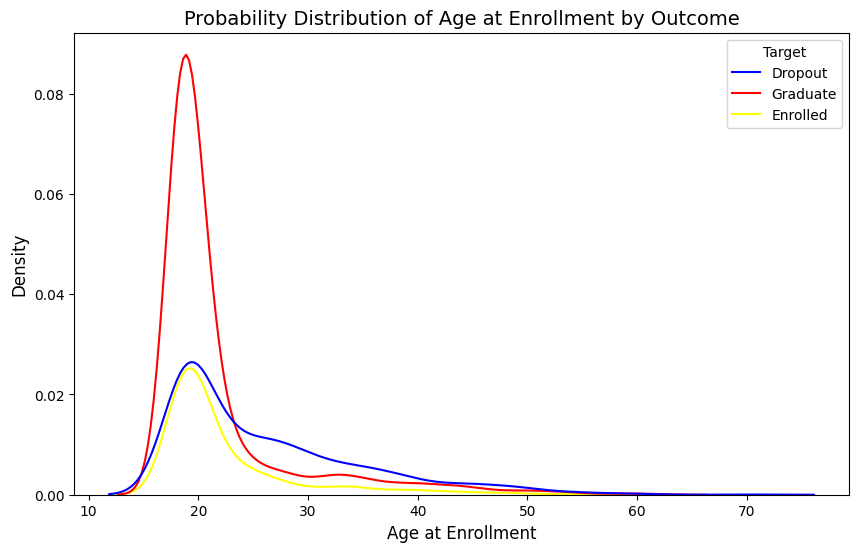

In [13]:
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=explore_data,
    x="Age at enrollment",
    hue="Target",
    fill=False,
    alpha=1, 
    palette={"Dropout": "blue", "Graduate": "red", "Enrolled": "yellow"},
)
plt.xlabel("Age at Enrollment", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Probability Distribution of Age at Enrollment by Outcome", fontsize=14)
plt.show()

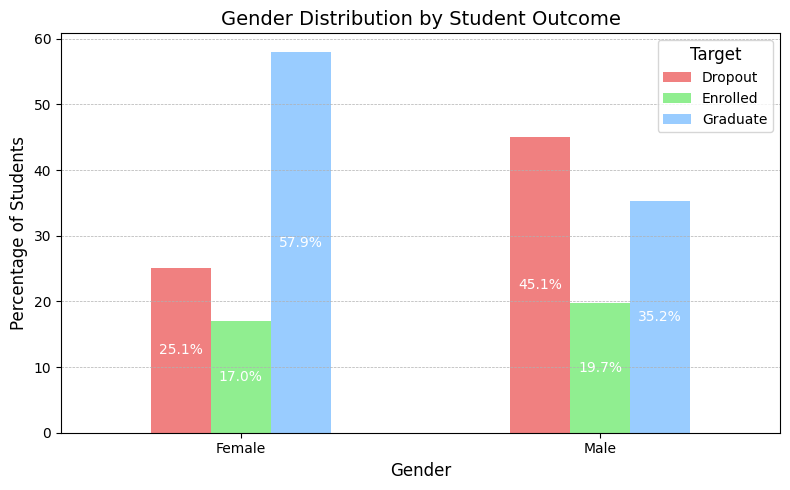

In [14]:
explore_data["Gender"] = explore_data["Gender"].replace({0: "Female", 1: "Male"})
gender_target_counts = pd.crosstab(explore_data["Gender"], explore_data["Target"], normalize="index") * 100

colors = ["#F08080", "#90EE90", "#99ccff"]
ax = gender_target_counts.plot(kind="bar", figsize=(8, 5), color=colors)

plt.xlabel("Gender", fontsize=12)
plt.ylabel("Percentage of Students", fontsize=12)  # Update y-axis label
plt.title("Gender Distribution by Student Outcome", fontsize=14)
plt.xticks(rotation=0, ha="center")
plt.legend(title="Target", title_fontsize=12)
plt.grid(axis="y", linestyle="--", linewidth=0.5)
plt.tight_layout()


for p in ax.patches:
    percentage = "{:.1f}%".format(p.get_height())  # Format as percentage
    ax.annotate(
        percentage,
        (p.get_x() + p.get_width() / 2.0, p.get_height() / 2.0),
        ha="center",
        va="center",
        fontsize=10,
        color="white",
    )

plt.show()

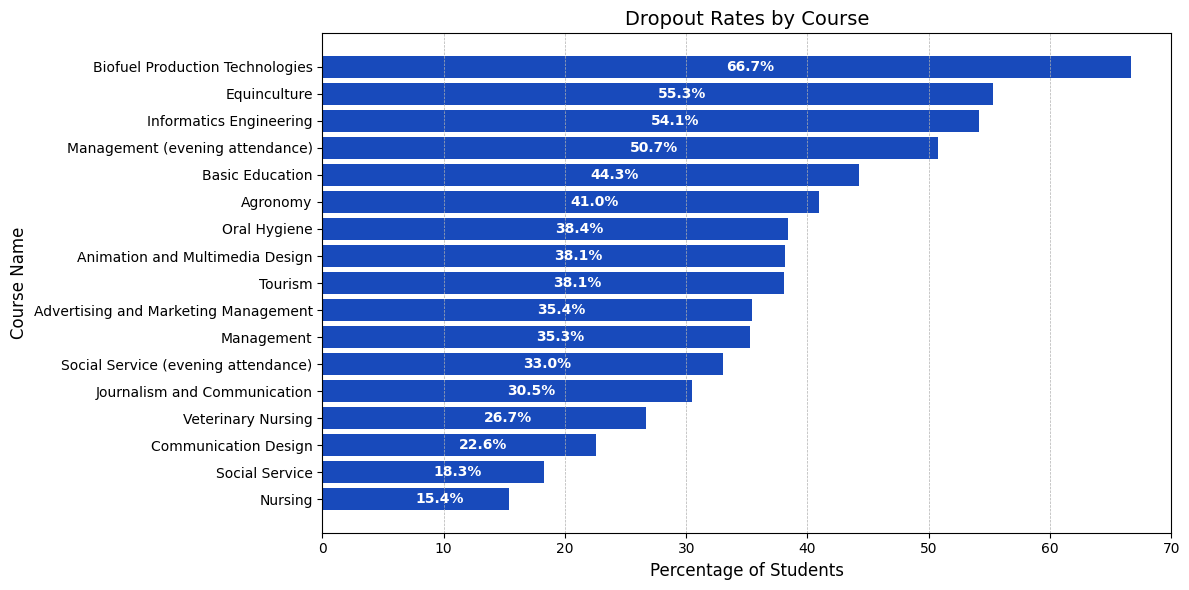

In [15]:
courses_map = {33:'Biofuel Production Technologies', 171:'Animation and Multimedia Design', 8014:'Social Service (evening attendance)', 9003:'Agronomy', 9070:'Communication Design', 9085:'Veterinary Nursing', 9119:'Informatics Engineering', 9130:'Equinculture', 9147:'Management', 9238:'Social Service', 9254:'Tourism', 9500:'Nursing', 9556:'Oral Hygiene', 9670:'Advertising and Marketing Management', 9773:'Journalism and Communication', 9853:'Basic Education', 9991:'Management (evening attendance)'}


explore_data["Course Name"] = explore_data["Course"].map(courses_map)

course_target_counts = (
        pd.crosstab(explore_data["Course Name"], explore_data["Target"], normalize="index") * 100
)

dropout_percentages = course_target_counts["Dropout"]
dropout_percentages = dropout_percentages.sort_values(ascending=True)

plt.figure(figsize=(12, 6))  
plt.barh(dropout_percentages.index, dropout_percentages.values, color="#184ABB")

plt.xlabel("Percentage of Students", fontsize=12)
plt.ylabel("Course Name", fontsize=12)
plt.title("Dropout Rates by Course", fontsize=14)
plt.yticks(rotation=0, ha="right")  # Rotate y-axis labels
plt.grid(axis="x", linestyle="--", linewidth=0.5)  # Add subtle gridlines to x-axis
plt.tight_layout()

for i, v in enumerate(dropout_percentages.values):
    plt.text(v / 2, i, "{:.1f}%".format(v), color="white", fontweight="bold", va="center")

plt.show()

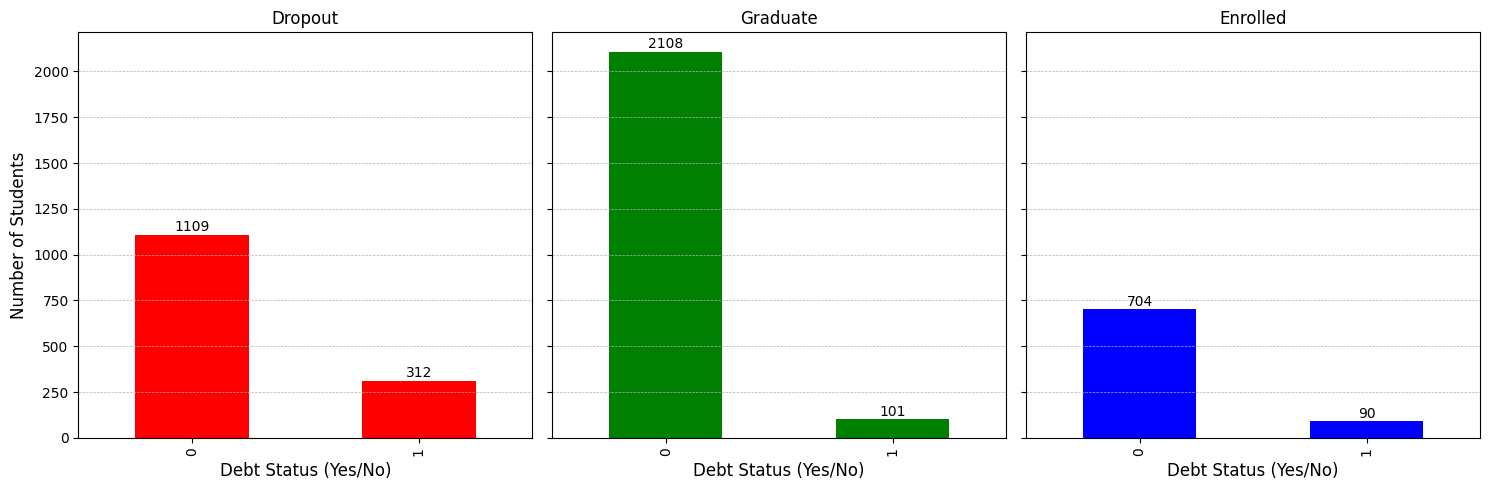

In [16]:
debt_counts_dropout = dropout_data["Debtor"].value_counts()
debt_counts_graduate = graduate_data["Debtor"].value_counts()
debt_counts_enrolled = enrolled_data["Debtor"].value_counts()


fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)  

debt_counts_dropout.plot(kind="bar", ax=axes[0], color="red", title="Dropout")
debt_counts_graduate.plot(kind="bar", ax=axes[1], color="green", title="Graduate")
debt_counts_enrolled.plot(kind="bar", ax=axes[2], color="blue", title="Enrolled")

for ax in axes:
    ax.set_xlabel("Debt Status (Yes/No)", fontsize=12)
    ax.set_ylabel("Number of Students", fontsize=12)
    ax.grid(axis="y", linestyle="--", linewidth=0.5)


for i, ax in enumerate(axes):
    for p in ax.patches:
        ax.annotate(
            str(p.get_height()),
            (p.get_x() + p.get_width() / 2.0, p.get_height() + 2),  # Adjust offset as needed
            ha="center",
            va="bottom",
            fontsize=10,
        )

plt.tight_layout()
plt.show()

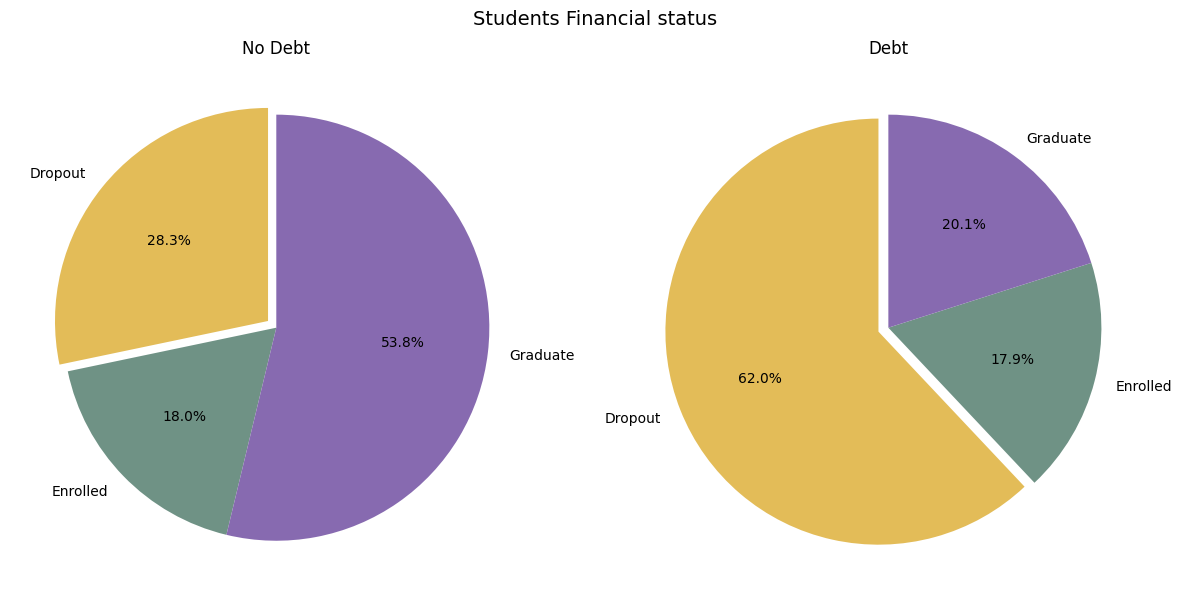

In [17]:
debt_target_counts = explore_data.groupby(["Debtor", "Target"])["Target"].count()

no_debt_data = debt_target_counts.loc[0]
debt_data = debt_target_counts.loc[1]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

colors = ["#E3BC58", "#6F9285", "#876AB0"]  
explode = (0.05, 0, 0)  

no_debt_data.plot(
    kind="pie",
    ax=axes[0],
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    explode=explode,
    title="No Debt",
)
debt_data.plot(
    kind="pie",
    ax=axes[1],
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    explode=explode,
    title="Debt",
)

for ax in axes:
    ax.set_ylabel("")  
plt.suptitle("Students Financial status", fontsize=14, y=1.0)  # Overall title
plt.tight_layout()
plt.show()

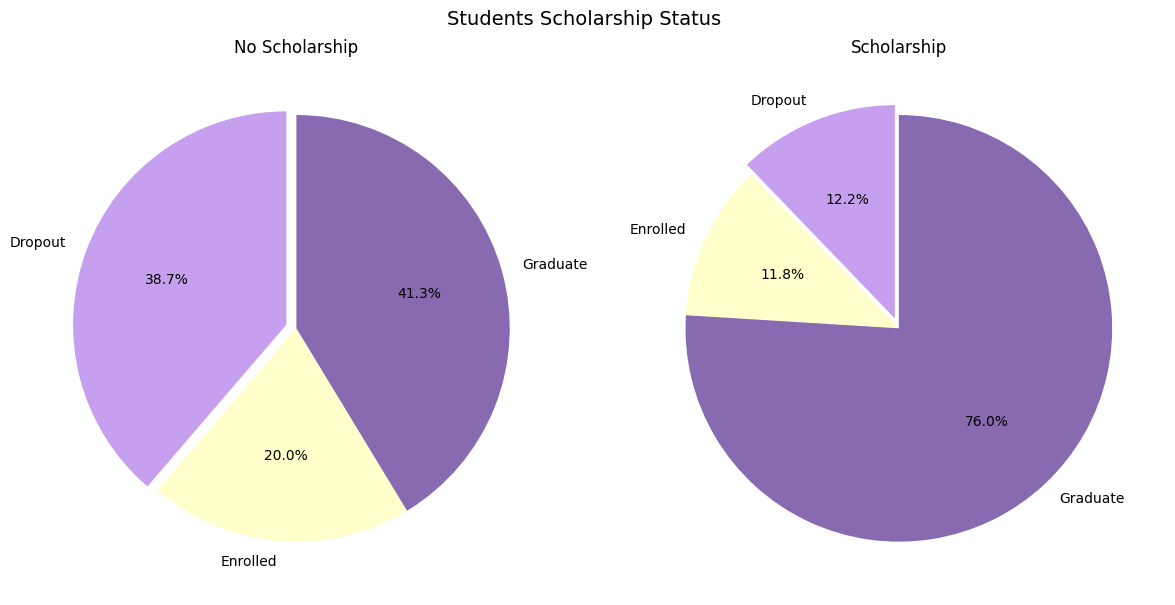

In [18]:
scholarship_target_counts = explore_data.groupby(["Scholarship holder", "Target"])["Target"].count()

no_scholarship_data = scholarship_target_counts.loc[0]
scholarship_data = scholarship_target_counts.loc[1]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
colors = ["#C79FEF", "#FFFFCB", "#876AB0"]
explode = (0.05, 0, 0)


no_scholarship_data.plot(
    kind="pie",
    ax=axes[0],
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    explode=explode,
    title="No Scholarship",
)
scholarship_data.plot(
    kind="pie",
    ax=axes[1],
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    explode=explode,
    title="Scholarship",
)

for ax in axes:
    ax.set_ylabel("")

plt.suptitle("Students Scholarship Status", fontsize=14, y=1.0)
plt.tight_layout()
plt.show()

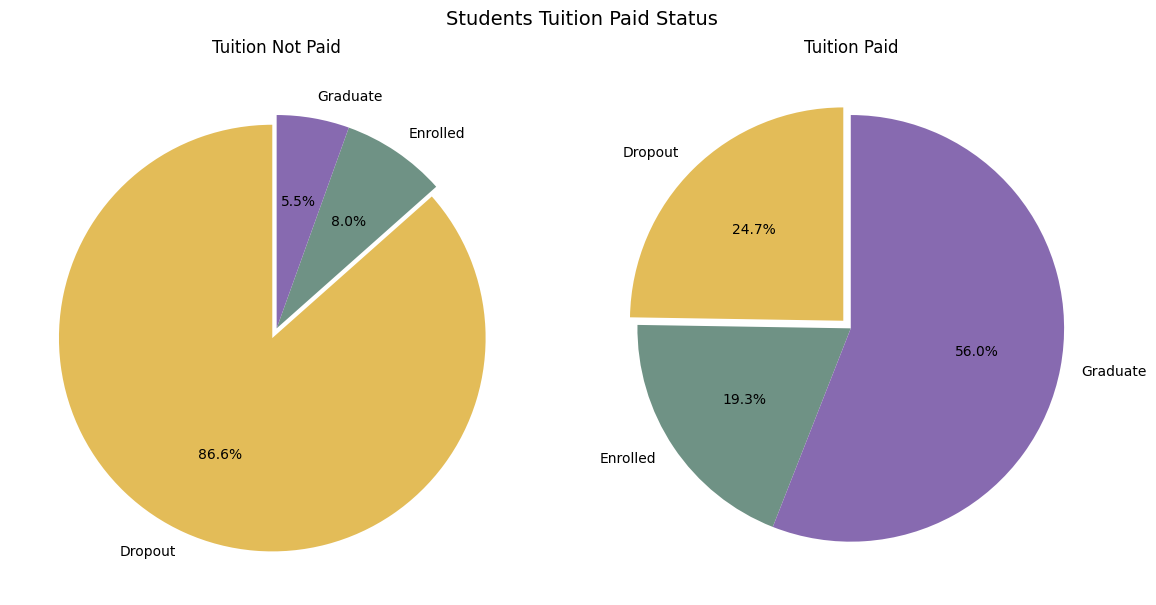

In [19]:
tuition_target_counts = explore_data.groupby(["Tuition fees up to date", "Target"])["Target"].count()
tuition_not_paid_data = tuition_target_counts.loc[0]
tuition_paid_data = tuition_target_counts.loc[1]


fig, axes = plt.subplots(1, 2, figsize=(12, 6))
colors = ["#E3BC58", "#6F9285", "#876AB0"]
explode = (0.05, 0, 0)

tuition_not_paid_data.plot(
    kind="pie",
    ax=axes[0],
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    explode=explode,
    title="Tuition Not Paid",
)
tuition_paid_data.plot(
    kind="pie",
    ax=axes[1],
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    explode=explode,
    title="Tuition Paid",
)

for ax in axes:
    ax.set_ylabel("")

plt.suptitle("Students Tuition Paid Status", fontsize=14, y=1.0)
plt.tight_layout()
plt.show()

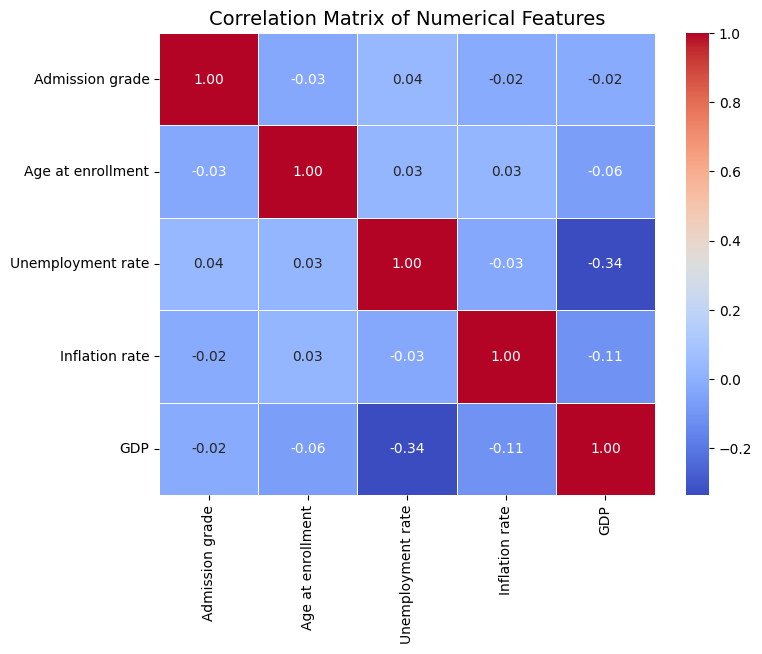

In [20]:
numerical_columns = [
    "Admission grade",
    "Age at enrollment",
    "Unemployment rate",
    "Inflation rate",
    "GDP",
]
data_numeric = explore_data[numerical_columns]


correlation_matrix = data_numeric.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm", 
    fmt=".2f",  
    linewidths=0.5,
)
plt.title("Correlation Matrix of Numerical Features", fontsize=14)
plt.show()

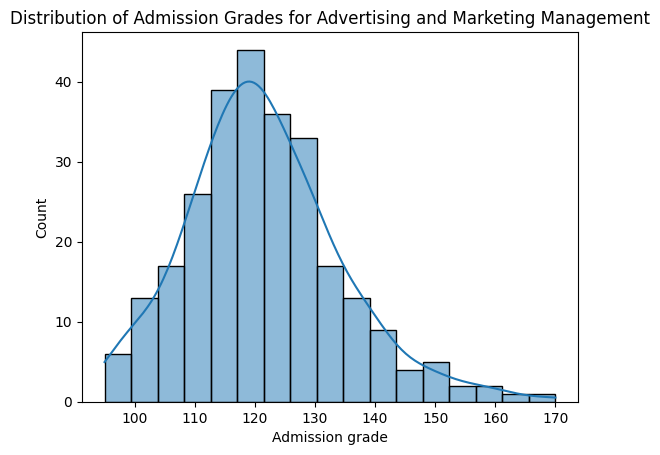

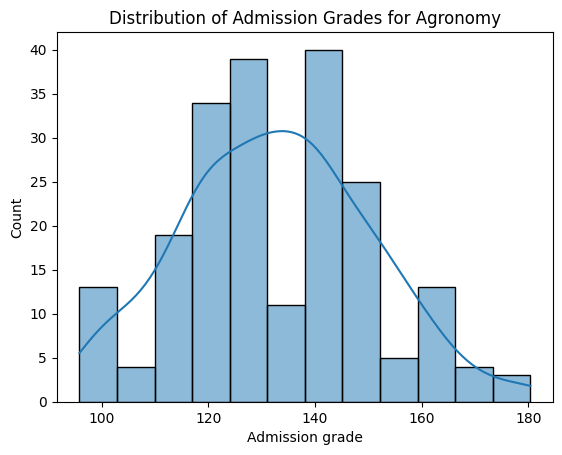

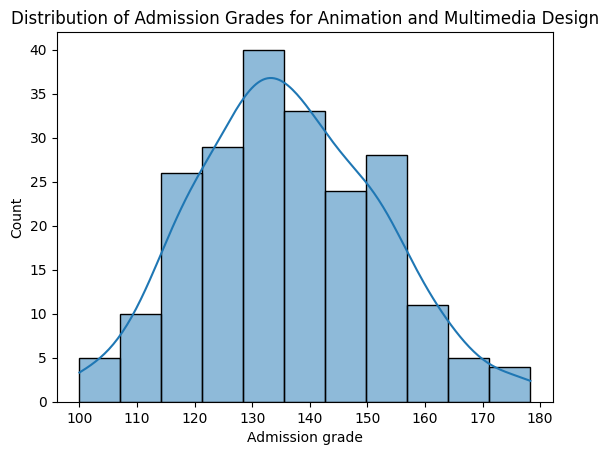

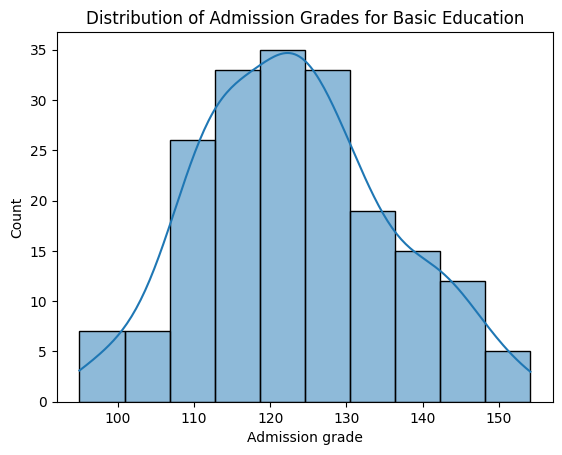

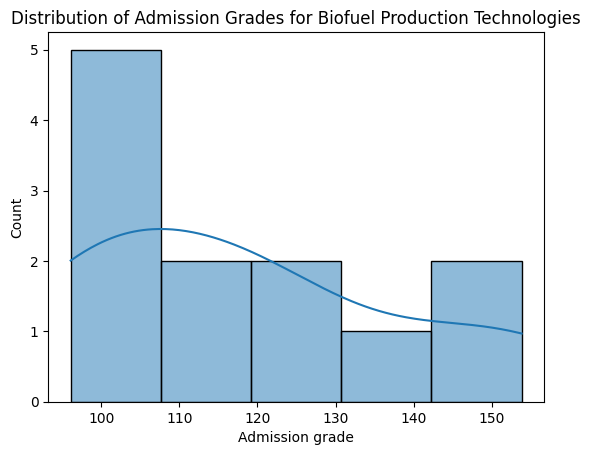

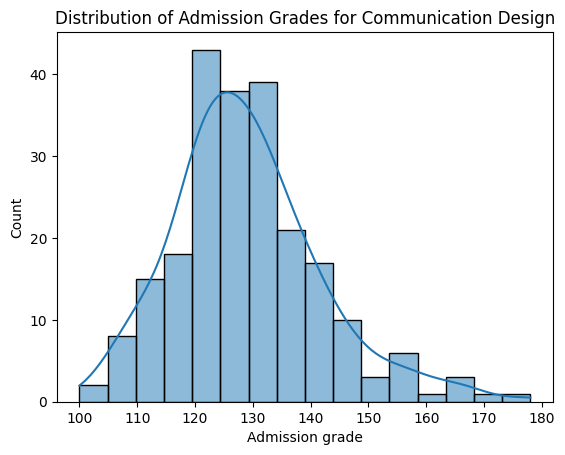

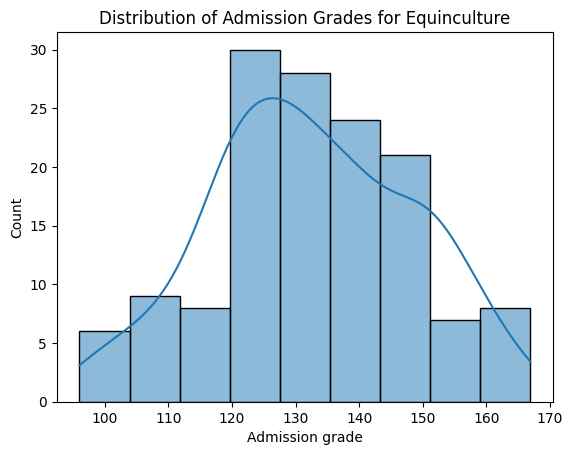

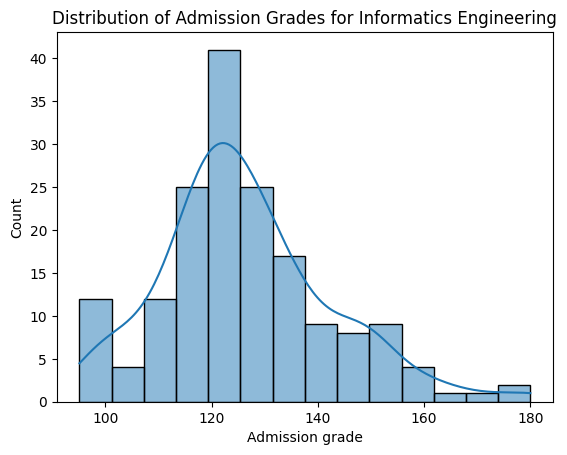

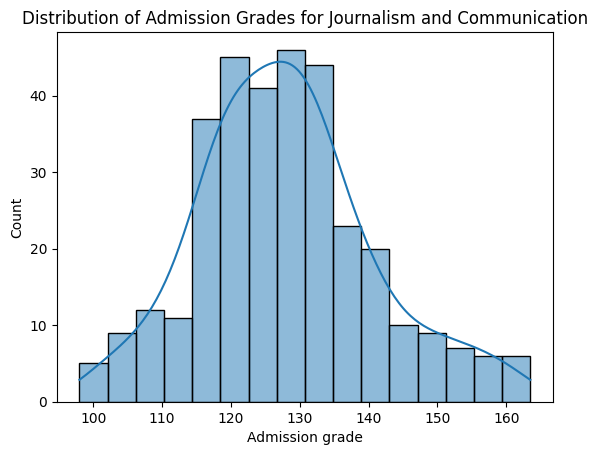

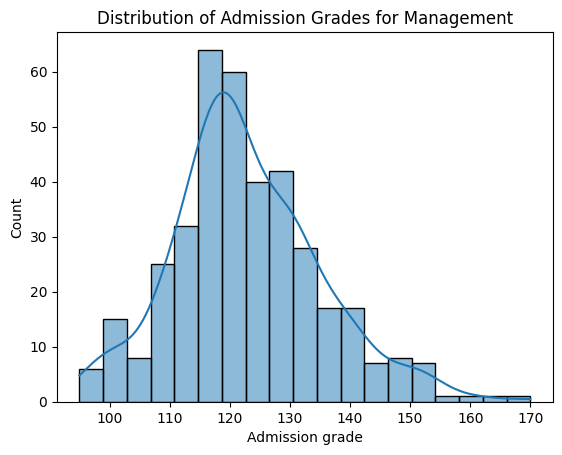

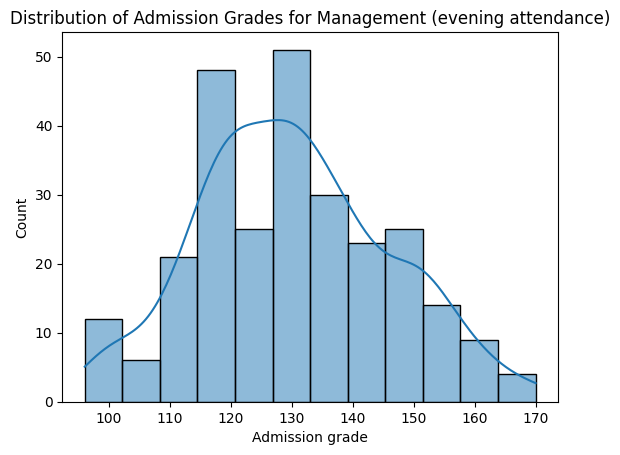

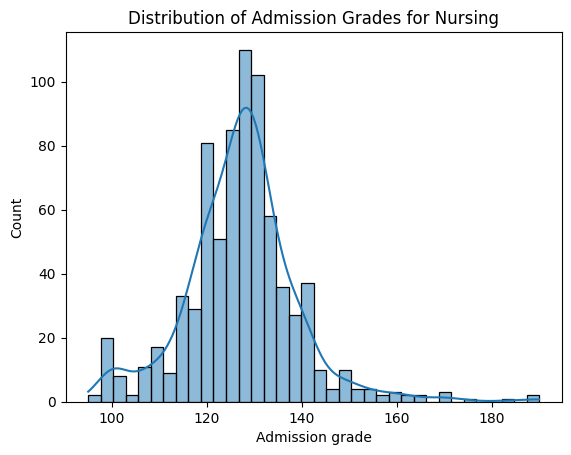

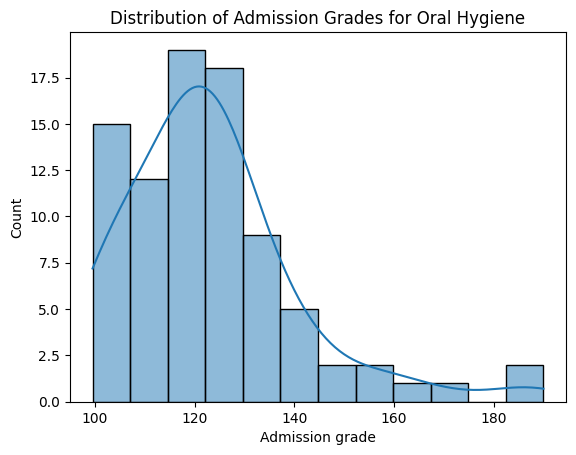

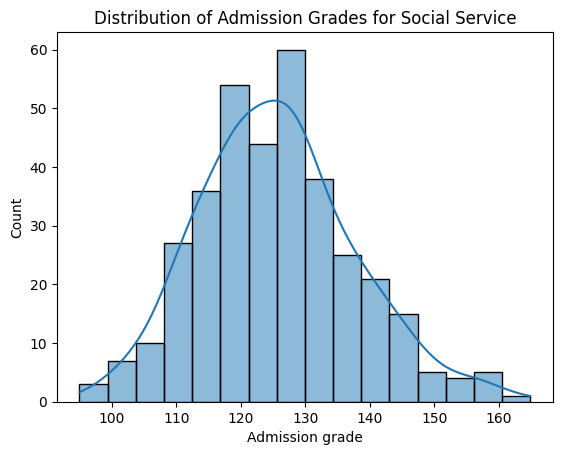

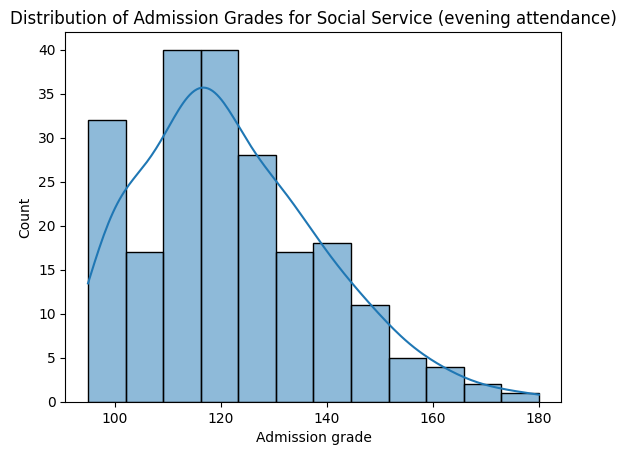

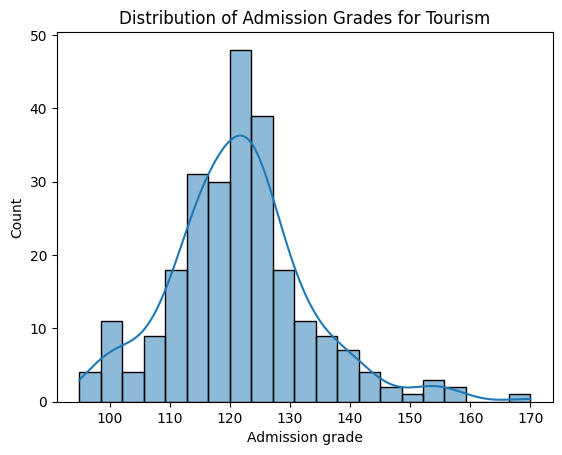

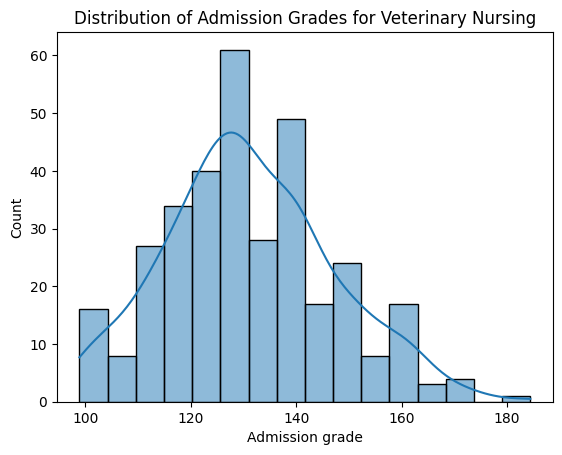

In [21]:
for course_name, course_data in explore_data.groupby("Course Name"):
    plt.figure()
    sns.histplot(course_data["Admission grade"], kde=True)
    plt.title(f"Distribution of Admission Grades for {course_name}")
    plt.show()

## Pre-processing

### Checking for null values

In [22]:
student_data.rename(columns = {'Nacionality':'Nationality'}, inplace = True)
student_data.isna().sum()

Marital Status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

The dataset is clean and has no null values

### Checking For Duplicate Values

In [23]:
student_data.duplicated().sum()

0

The dataset has no duplicate rows

### Mapping target classes to 0 and 1

In [24]:
student_data = student_data[student_data['Target'] != 'Enrolled']
student_data.reset_index(drop=True, inplace=True)

As we are only interested in studying dropout rates in students, we are only interested in data which can give conclusive information on weather a student graduated or dropout. The 'Enrolled' class does not give any relevant information for out study, as an enrolled student can either graduate or dropout, hence dropping this class.

In [25]:
mapping = {"Graduate": 0, "Dropout": 1}
student_data['Target'] = student_data['Target'].map(mapping)
student_data

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,0
3626,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,1
3627,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,1
3628,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,0


As we need to apply classification models to our dataset, it is important to encode the categorical target into numerical data. Here the 'Graduate' class is mapped to '0' and the 'Dropout' class is mapped to '1'


### Identifying Features that have a high correlation with the Target

In [26]:
student_data.corr()['Target'].sort_values(ascending=True).head(10)

Curricular units 2nd sem (approved)   -0.653995
Curricular units 2nd sem (grade)      -0.605350
Curricular units 1st sem (approved)   -0.554881
Curricular units 1st sem (grade)      -0.519927
Tuition fees up to date               -0.442138
Scholarship holder                    -0.313018
Curricular units 2nd sem (enrolled)   -0.182897
Curricular units 1st sem (enrolled)   -0.161074
Admission grade                       -0.128058
Displaced                             -0.126113
Name: Target, dtype: float64

In [27]:
student_data.corr()['Target'].sort_values(ascending=False).head(10)

Target                                            1.000000
Age at enrollment                                 0.267229
Debtor                                            0.267207
Gender                                            0.251955
Application mode                                  0.244507
Curricular units 2nd sem (without evaluations)    0.102687
Marital Status                                    0.100479
Curricular units 1st sem (without evaluations)    0.074642
Previous qualification                            0.062323
Mother's qualification                            0.053989
Name: Target, dtype: float64

Looking at the correlation with target, the follow features have a high correlation:
1. Semester 2 grade
2. Semester 1 grade
3. Tuition Fees up to date
4. Scholarship holder
5. Age at enrollment
6. Debtor
7. Gender
8. Admission Grade

### Identifying and Removing Outliers (only in non-categorical features that have high correlations)

<Axes: >

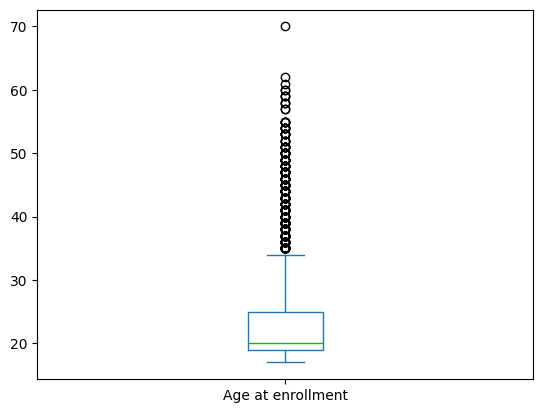

In [28]:
student_data['Age at enrollment'].plot(kind='box')

The data suggests that most of the students are below the age of 35 and hence it would be beneficial to understand the dropout trends in that group of students, hence only selecting a student under 35 years of age.

In [29]:
student_data = student_data[student_data['Age at enrollment'] < 35]
student_data.shape

(3241, 37)

<Axes: >

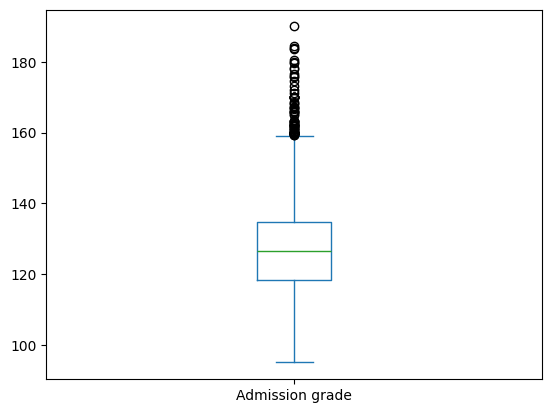

In [30]:
student_data['Admission grade'].plot(kind='box')

In [31]:
student_data = student_data[student_data['Admission grade'] < 160]
student_data.shape

(3154, 37)

Students having excellent admission grades are outliers and do not represent an average school student. Most of them are academically brilliant and in most cases have their education completely sponsored. As these groups of students are not at risk of dropping out, we are removing the outlier.

### Understanding Class Distributions

([<matplotlib.axis.XTick at 0x7b8310c29a10>,
 [Text(0, 0, 'Dropout'), Text(1, 0, 'Not-Dropout')])

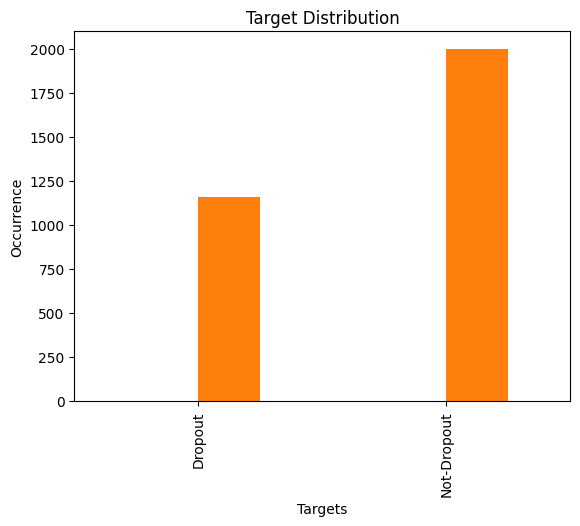

In [32]:
unique_targets = student_data['Target'].unique().tolist()
class_distributions = dict()
for target in unique_targets:
  class_distributions[target] = student_data[student_data['Target'] == target]['Target'].count()
class_dist = pd.DataFrame({'target':class_distributions.keys(), 'occurrence':class_distributions.values()})
ax = class_dist.plot(kind='bar', title='Target Distribution', xlabel='Targets', ylabel='Occurrence', legend=False)
plt.xticks([0, 1], ['Dropout', 'Not-Dropout'])

In [33]:
for target in unique_targets:
    print(target,' = ', round(int(class_dist[class_dist['target']== target]['occurrence'])*100/class_dist['occurrence'].sum(),2),'%')

1  =  36.68 %
0  =  63.32 %


/tmp/ipykernel_24272/1811503130.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print(target,' = ', round(int(class_dist[class_dist['target']== target]['occurrence'])*100/class_dist['occurrence'].sum(),2),'%')


The above distribution of targets clearly shows an imbalance in classes. The 'Graduate' class consists of almost 2/3 of the dataset, whereas 'Dropouts' only account for 1/3rd of the dataset. This can be considered as a case of moderate imbalance.

### Data Transformation and Dimensionality Reduction

In [34]:
matrix = student_data.drop(columns=['Target'], axis=1).corr()
high_corr = abs(matrix) >=0.70  # looking at correlations higher than 0.70
cols = high_corr.columns.tolist()
for col in cols:
    temp = high_corr[high_corr[col] == True].index.tolist()
    temp.pop(temp.index(col))
    if len(temp) != 0:
        print(col,' has high corr with ',temp)
        print(matrix[col].loc[temp] , '\n\n\n')

Nationality  has high corr with  ['International']
International    0.808226
Name: Nationality, dtype: float64 



Mother's occupation  has high corr with  ["Father's occupation"]
Father's occupation    0.881943
Name: Mother's occupation, dtype: float64 



Father's occupation  has high corr with  ["Mother's occupation"]
Mother's occupation    0.881943
Name: Father's occupation, dtype: float64 



International  has high corr with  ['Nationality']
Nationality    0.808226
Name: International, dtype: float64 



Curricular units 1st sem (credited)  has high corr with  ['Curricular units 1st sem (enrolled)', 'Curricular units 2nd sem (credited)']
Curricular units 1st sem (enrolled)    0.753273
Curricular units 2nd sem (credited)    0.944374
Name: Curricular units 1st sem (credited), dtype: float64 



Curricular units 1st sem (enrolled)  has high corr with  ['Curricular units 1st sem (credited)', 'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (credited)', 'Curricular uni

looking at the above results, we can identify features that are highly correlated. Highly correlated features do not provide any additional information, and so we can select one feature and drop the remaining features. Another approach is to merge similar features into a single features, and this is achieved via principal component analysis. We can see that all the sem 1 and sem 2 features are highly correlated, and hence we are only picking sem 1 and sem 2 grades and eliminate the remaining features. On further analysis, both sem1 ans sem 2 grades are also highly correlated; hence we can merge them into 1 feature called—'Academic PCA.' At first glance, a similar approach can be applied to the mother's and father's occupation as these two features are also highly correlated. the major difference is that these are categorical features whereas academic grades were non-categorical features. PCA approach is only suitable for non-categorical data.

In [35]:
reduce_cols = ['Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)','International']
academic_data = student_data[['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']]
scaler = StandardScaler()
scaler.fit(academic_data)
academic_data_scaled = scaler.transform(academic_data)
pca = PCA(n_components=1)
pca.fit(academic_data_scaled)
academic_pca = pca.transform(academic_data_scaled)
student_data.drop(reduce_cols, axis=1, inplace=True)
student_data.reset_index(drop=True, inplace=True)
academic_pca = pd.DataFrame(academic_pca)
academic_pca.rename(columns={0:'academic_pca'}, inplace=True)
student_data = student_data.merge(academic_pca, how='left', left_index=True, right_index=True)
student_data.head()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Unemployment rate,Inflation rate,GDP,Target,academic_pca
0,1,17,5,171,1,1,122.0,1,19,12,...,0,1,1,0,20,10.8,1.4,1.74,1,2.920916
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,1,0,19,13.9,-0.3,0.79,0,-0.925974
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,1,0,19,10.8,1.4,1.74,1,2.920916
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,1,0,0,20,9.4,-0.8,-3.12,0,-0.674725
4,1,1,1,9500,1,1,142.0,1,19,38,...,0,1,0,1,18,15.5,2.8,-4.06,0,-0.914650


### Visualizing Feature correlation with the target

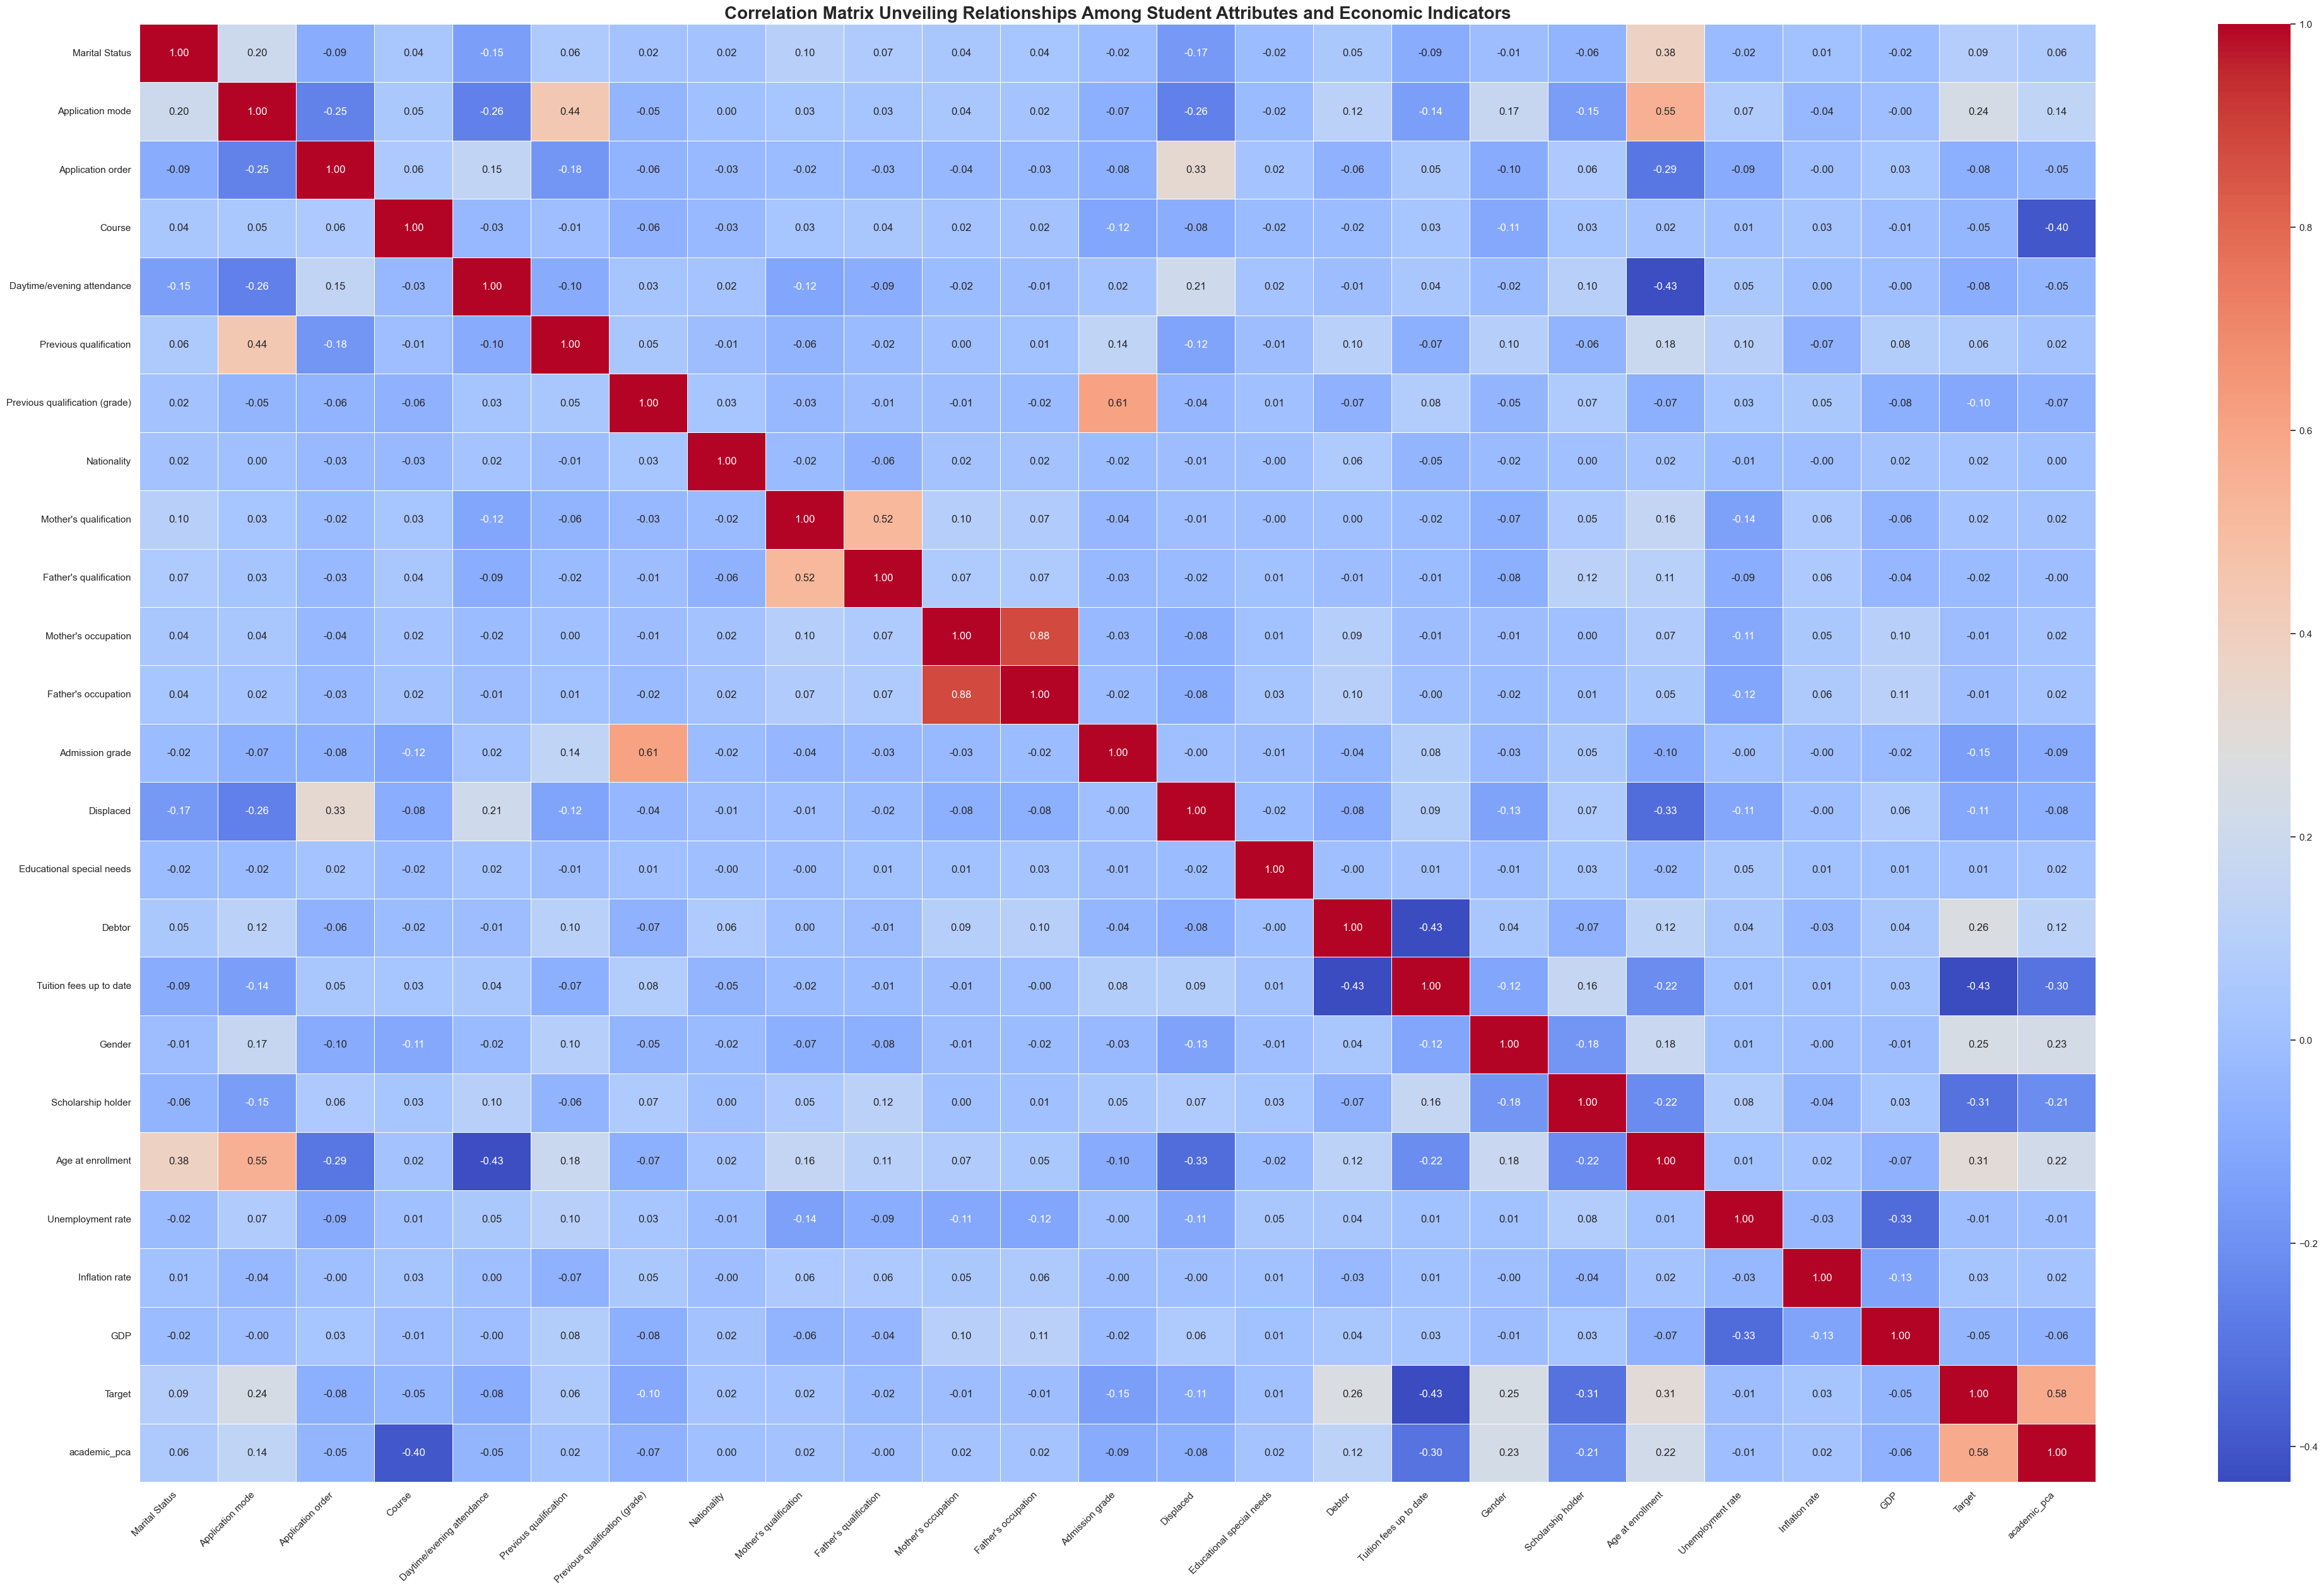

In [36]:
corr_data = student_data.copy()
corr_data = corr_data[corr_data['Target'] != 'Enrolled']
corr_data.reset_index(drop=True, inplace=True)
data_encoded = pd.get_dummies(corr_data)
correlation_matrix = data_encoded.corr()

plt.figure(figsize=(50, 30)) 
sns.set(style="white")
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, linecolor="white")
plt.title(
    "Correlation Matrix Unveiling Relationships Among Student Attributes and Economic Indicators",
    fontsize=20,
    fontweight="bold",
)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()
#plt.savefig('heatmap.pdf')

### Function for computing baseline accuracy

In [37]:
from sklearn.dummy import DummyClassifier


def compute_baseline_accuracy(features: pd.DataFrame, tar: pd.DataFrame) -> None:
    # Create a ZeroR classifier (predicts the most frequent class)
    dummy_clf = DummyClassifier(strategy="most_frequent")
    dummy_clf.fit(features, tar)  # Reshape X to match scikit-learn input format

    # Predictions (always predicts 1 for Democrat)
    predictions = dummy_clf.predict(features)

    # Calculate accuracy (compare with your model's accuracy)
    baseline_accuracy = dummy_clf.score(features, tar)

    print(f"Predictions: {predictions}")
    print(f"Baseline Accuracy: {baseline_accuracy:.2f}")

## Balancing Classes

In [38]:
X = student_data.drop(columns=['Target'])
y = student_data['Target']
X.name = 'UnBalanced_X'
y.name = 'UnBalanced_y'

### Technique 1 - Oversampling - SMOTE

In [39]:
from imblearn.over_sampling import SMOTE
from collections import Counter
somte = SMOTE()
X_SMOTE, y_SMOTE = somte.fit_resample(X,y)
X_SMOTE.name = 'SMOTE_X'
y_SMOTE.name = 'SMOTE_y'

# Check the class distribution after SMOTE
print("Class distribution after SMOTE:", sorted(Counter(y_SMOTE).items()))

Class distribution after SMOTE: [(0, 1997), (1, 1997)]


In [40]:
compute_baseline_accuracy(X_SMOTE, y_SMOTE)

Predictions: [0 0 0 ... 0 0 0]
Baseline Accuracy: 0.50


### Technique 2 - Oversampling - RandomOverSampler

In [41]:
from imblearn.over_sampling import RandomOverSampler

# Initialize RandomOverSampler
ros = RandomOverSampler()

# Fit and transform the dataset
X_ROS, y_ROS = ros.fit_resample(X, y)
X_ROS.name = 'ROS_X'
y_ROS.name = 'ROS_y'

# Check the class distribution after Random Over Sampling
print("Class distribution after Random Over Sampling:", sorted(Counter(y_ROS).items()))

Class distribution after Random Over Sampling: [(0, 1997), (1, 1997)]


In [42]:
compute_baseline_accuracy(X_ROS, y_ROS)

Predictions: [0 0 0 ... 0 0 0]
Baseline Accuracy: 0.50


### Technique 3 - Oversampling - ADASYN

In [43]:
from imblearn.over_sampling import ADASYN

# Initialize ADASYN
adasyn = ADASYN()

# Fit and transform the dataset
X_ADASYN, y_ADASYN = adasyn.fit_resample(X, y)
X_ADASYN.name = 'ADASYN_X'
y_ADASYN.name = 'ADASYN_y'

# Check the class distribution after ADASYN
print("Class distribution after ADASYN:", sorted(Counter(y_ADASYN).items()))

Class distribution after ADASYN: [(0, 1997), (1, 2017)]


In [44]:
compute_baseline_accuracy(X_ADASYN, y_ADASYN)

Predictions: [1 1 1 ... 1 1 1]
Baseline Accuracy: 0.50


### Technique 4 - Undersampling - RandomUnderSampler

In [45]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_RUS, y_RUS = rus.fit_resample(X, y)
X_RUS.name = 'RUS_X'
y_RUS.name = 'RUS_y'


# Check the class distribution after Random Under Sampling
print("Class distribution after Random Under Sampling:", sorted(Counter(y_RUS).items()))

Class distribution after Random Under Sampling: [(0, 1157), (1, 1157)]


In [46]:
compute_baseline_accuracy(X_RUS, y_RUS)

Predictions: [0 0 0 ... 0 0 0]
Baseline Accuracy: 0.50


## Creating Dataframe to store performance data for different models and datasets

In [47]:
Datasets = {'Unbalanced': [X,y], 'SMOTE': [X_SMOTE,y_SMOTE], 'RandomOverSampler': [X_ROS,y_ROS], 'ADASYN': [X_ADASYN,y_ADASYN], 'RandomUnderSampler': [X_RUS,y_RUS]}

In [48]:
model_names = ['LR_lasso', 'LR_Ridge', 'XGBoost', 'Random_Forest']
balancing = ['Unbalanced', 'SMOTE', 'RandomOverSampler', 'ADASYN', 'RandomUnderSampler']
performance_metrics = {
    'Accuracy': [np.nan, np.nan, np.nan, np.nan, np.nan],
    'Precision': [np.nan, np.nan, np.nan, np.nan, np.nan],
    'Recall': [np.nan, np.nan, np.nan, np.nan, np.nan],
    'F1': [np.nan, np.nan, np.nan, np.nan, np.nan],
}
models = dict()
models_rfe = dict()
for model_name in model_names:
    models[model_name] = pd.DataFrame(performance_metrics, index=balancing)
for model_name in model_names:
    models_rfe[model_name] = pd.DataFrame(performance_metrics, index=balancing)

## Feature Selection using Recursive Feature Elimination

### Rigde Regression

In [49]:
variance = 0.001
best_accuracy = 0
X_features_ridge = list()
n_features = 0
random_state = 0
while n_features == 0:
    for data in Datasets.keys():
        X_data = Datasets[data][0]
        y_data = Datasets[data][1]
        X_features_rg, accuracy_rg = Helper.RFE_logistic_regression(X_data, y_data,variance_pct=variance, regression='l2', random_state=random_state)
        if (accuracy_rg >= best_accuracy*(1-variance)) and (3 <= len(X_features_rg) <= 10):
            best_accuracy = accuracy_rg
            X_features_ridge = X_features_rg
    if len(X_features_ridge) != 0:
        print(X_features_ridge)
        print('accuracy = ', best_accuracy, 'at variance = ', round(variance, 3))
        n_features = len(X_features_ridge)
    else:
        variance += 0.001
    if variance > 0.05:
        print("Could not reduce number of features significantly, try again")
        break

['Tuition fees up to date', 'Scholarship holder', 'academic_pca']
accuracy =  0.8081734778982486 at variance =  0.012


### Lasso Regression

In [50]:
variance = 0.001
best_accuracy = 0
X_features_lasso = list()
n_features = 0
random_state = 0
while n_features == 0:
    for data in Datasets.keys():
        X_data = Datasets[data][0]
        y_data = Datasets[data][1]
        X_features_lr, accuracy_lr = Helper.RFE_logistic_regression(X_data, y_data, variance_pct=variance, regression='l1', random_state=random_state)
        if (accuracy_lr >= best_accuracy*(1-variance)) and (3 <= len(X_features_lr) <= 10):
            best_accuracy = accuracy_lr
            X_features_lasso = X_features_lr
    if len(X_features_lasso) != 0:
        print(X_features_lasso)
        print('accuracy = ', best_accuracy, 'at variance = ', round(variance, 3))
        n_features = len(X_features_lasso)
    else:
        variance += 0.001
    if variance > 0.05:    
        print("Could not reduce number of features significantly, try again")
        break

['Tuition fees up to date', 'Scholarship holder', 'academic_pca']
accuracy =  0.8081734778982486 at variance =  0.013


Lasso and Ridge logistic regression methods for recursive feature elimination give very the same 3 featues, which suggest that they are the top 3 important features in this dataset.

In [52]:
# Select features from RFE - logistic ridge
X_ridge = student_data[X_features_ridge]

# Select features from RFE - logistic lasso
X_lasso = student_data[X_features_lasso]

# Select features from correlation matrix
X_corr = student_data[['academic_pca','Age at enrollment', 'Tuition fees up to date','Scholarship holder', 'Debtor', 'Gender', 'Admission grade']]

## Logistic Regression—Using Correlation Features

In [53]:
X = X_corr.copy()

### Lasso Regression

model =  LR_lasso 	dataset =  Unbalanced


accuracy after feature drop:  0.8416050686378036
Precision: 0.8308
Recall: 0.6708
F1: 0.7423


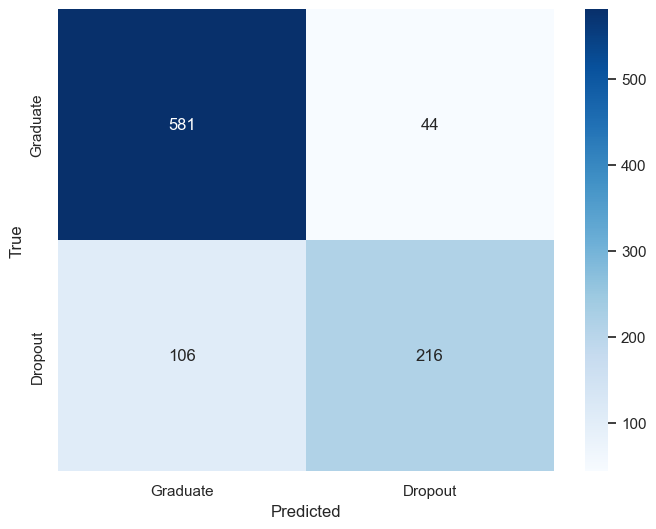

model =  LR_lasso 	dataset =  SMOTE


accuracy after feature drop:  0.8373812038014784
Precision: 0.8732
Recall: 0.6694
F1: 0.7579


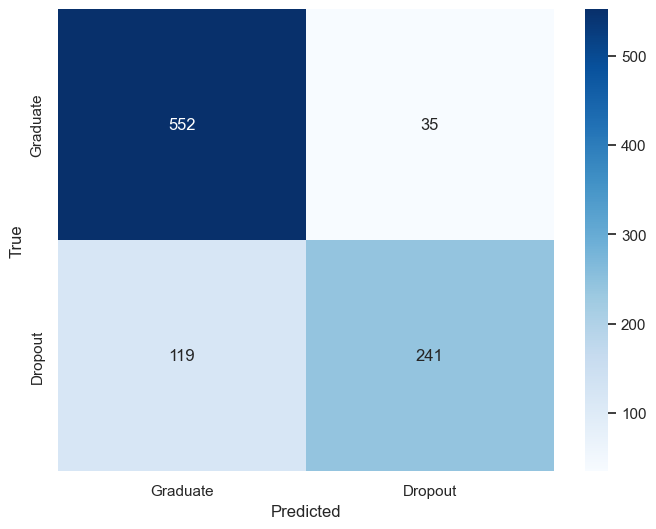

model =  LR_lasso 	dataset =  RandomOverSampler


accuracy after feature drop:  0.8648363252375924
Precision: 0.8655
Recall: 0.7382
F1: 0.7968


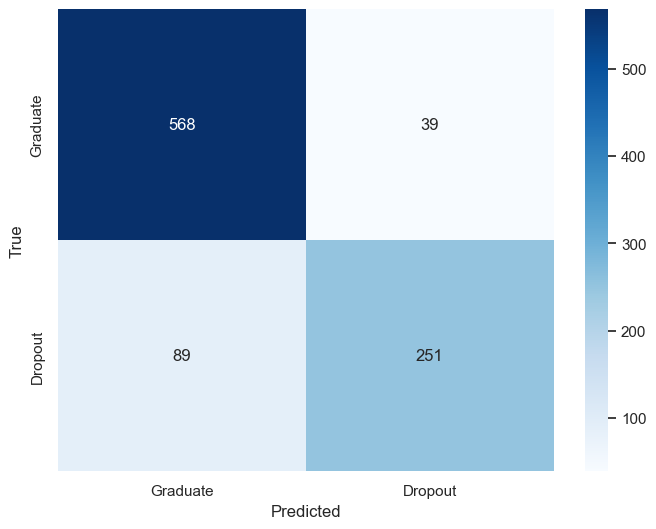

model =  LR_lasso 	dataset =  ADASYN


accuracy after feature drop:  0.8331573389651531
Precision: 0.8387
Recall: 0.6744
F1: 0.7476


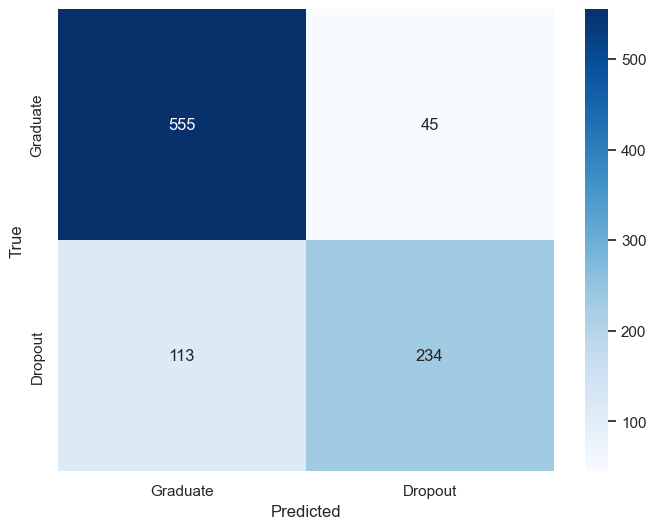

model =  LR_lasso 	dataset =  RandomUnderSampler


accuracy after feature drop:  0.8437170010559663
Precision: 0.8806
Recall: 0.6705
F1: 0.7613


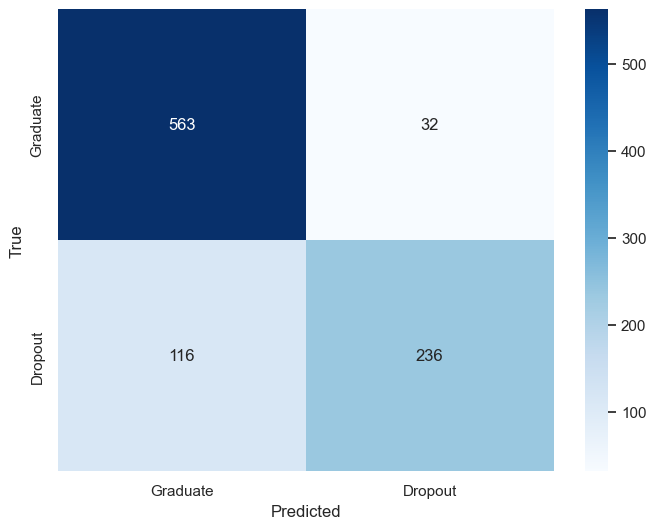

In [54]:
model_name = 'LR_lasso'
for data in Datasets.keys():
    print('model = ', model_name, '\tdataset = ', data)
    models[model_name].loc[data, 'Accuracy'], models[model_name].loc[data, 'Precision'], models[model_name].loc[data, 'Recall'], models[model_name].loc[data, 'F1'] = Helper.logistic_regression(X, y, regression='l1', verbose=True)

### Ridge Regression

model =  LR_Ridge 	dataset =  Unbalanced


accuracy after feature drop:  0.8405491024287223
Precision: 0.8571
Recall: 0.6526
F1: 0.7410


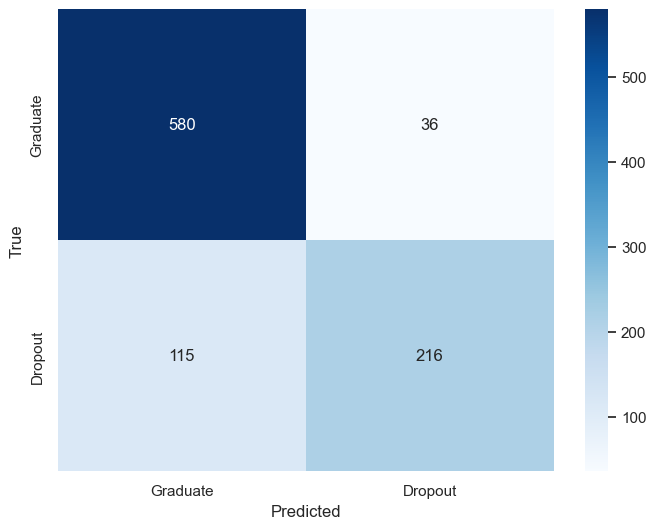

model =  LR_Ridge 	dataset =  SMOTE


accuracy after feature drop:  0.8458289334741288
Precision: 0.8622
Recall: 0.6952
F1: 0.7697


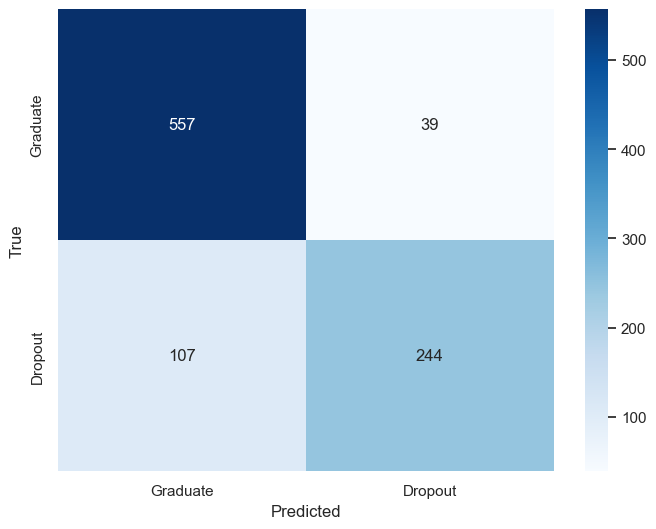

model =  LR_Ridge 	dataset =  RandomOverSampler


accuracy after feature drop:  0.82259767687434
Precision: 0.8551
Recall: 0.6484
F1: 0.7375


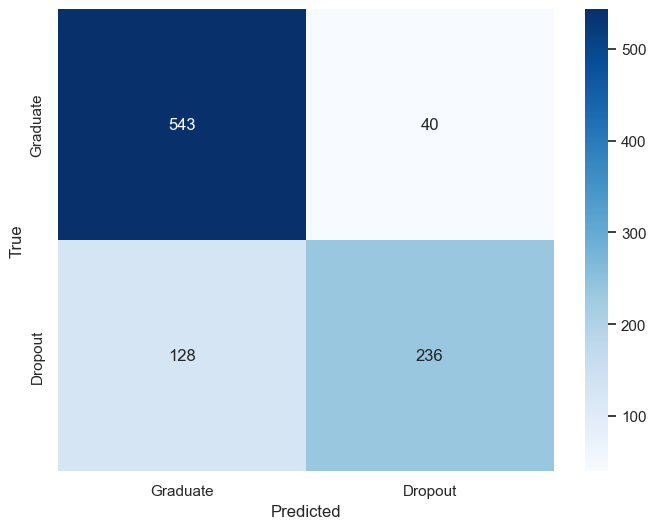

model =  LR_Ridge 	dataset =  ADASYN


accuracy after feature drop:  0.8458289334741288
Precision: 0.9061
Recall: 0.6765
F1: 0.7747


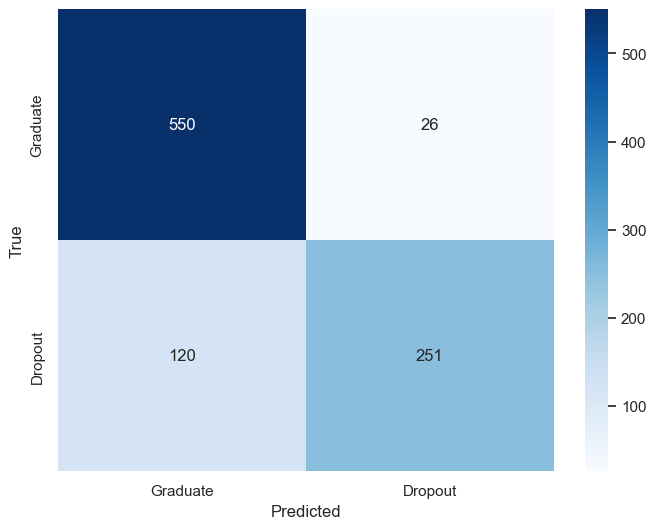

model =  LR_Ridge 	dataset =  RandomUnderSampler


accuracy after feature drop:  0.8426610348468849
Precision: 0.8544
Recall: 0.6677
F1: 0.7496


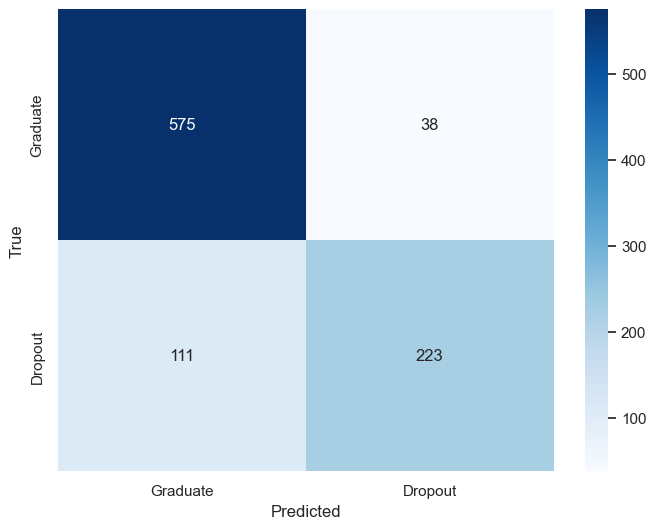

In [55]:
model_name = 'LR_Ridge'
for data in Datasets.keys():
    print('model = ', model_name, '\tdataset = ', data)
    models_rfe[model_name].loc[data, 'Accuracy'], models_rfe[model_name].loc[data, 'Precision'], models_rfe[model_name].loc[data, 'Recall'], models_rfe[model_name].loc[data, 'F1'] = Helper.logistic_regression(X, y, regression='l2', verbose=True)

## Logistic Regression - Using RFE fetatures

In [56]:
X = X_ridge.copy()

### Lasso Regression

model =  LR_lasso 	dataset =  Unbalanced


accuracy after feature drop:  0.8437170010559663
Precision: 0.8971
Recall: 0.6393
F1: 0.7466


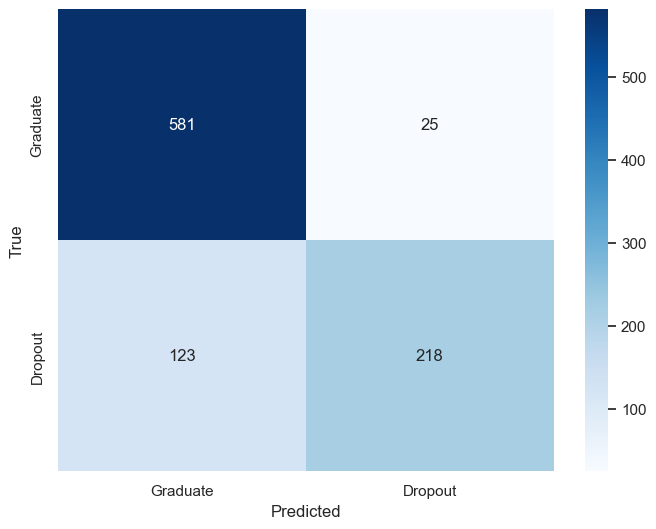

model =  LR_lasso 	dataset =  SMOTE


accuracy after feature drop:  0.8236536430834214
Precision: 0.8776
Recall: 0.6012
F1: 0.7136


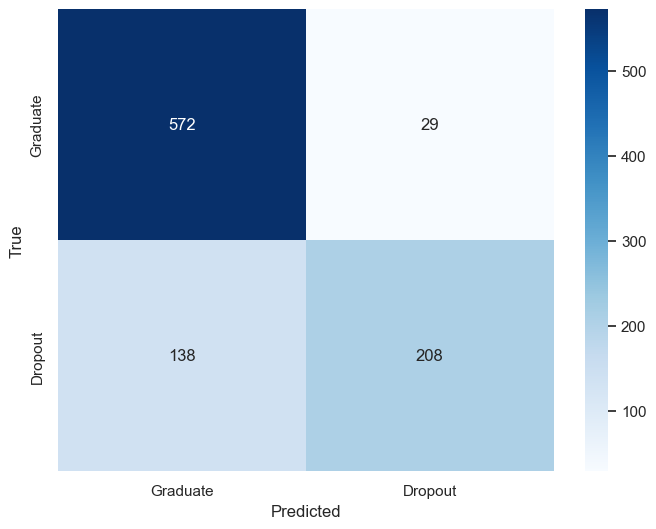

model =  LR_lasso 	dataset =  RandomOverSampler


accuracy after feature drop:  0.8437170010559663
Precision: 0.9016
Recall: 0.6395
F1: 0.7483


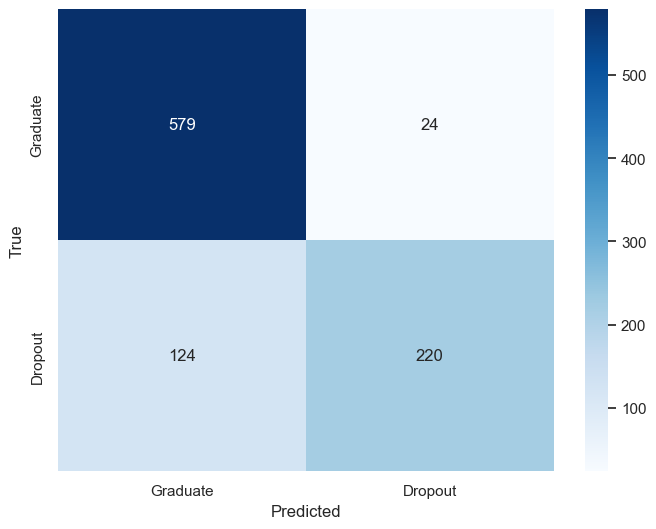

model =  LR_lasso 	dataset =  ADASYN


accuracy after feature drop:  0.82259767687434
Precision: 0.8931
Recall: 0.6257
F1: 0.7358


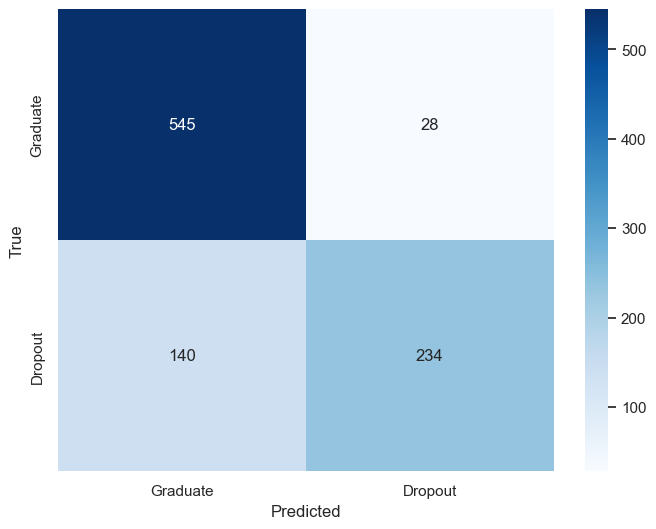

model =  LR_lasso 	dataset =  RandomUnderSampler


accuracy after feature drop:  0.8489968321013728
Precision: 0.9310
Recall: 0.6603
F1: 0.7727


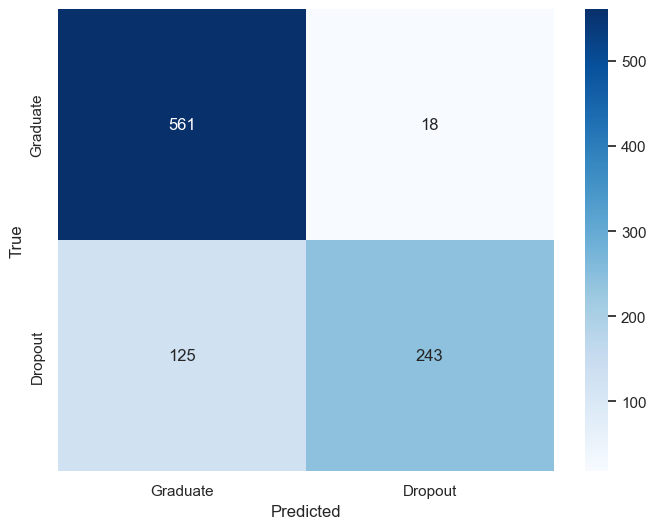

In [57]:
model_name = 'LR_lasso'
for data in Datasets.keys():
    print('model = ', model_name, '\tdataset = ', data)
    models_rfe[model_name].loc[data, 'Accuracy'], models_rfe[model_name].loc[data, 'Precision'], models_rfe[model_name].loc[data, 'Recall'], models_rfe[model_name].loc[data, 'F1'] = Helper.logistic_regression(X, y, regression='l1', verbose=True)

### Ridge Regression

model =  LR_Ridge 	dataset =  Unbalanced


accuracy after feature drop:  0.8373812038014784
Precision: 0.8850
Recall: 0.6098
F1: 0.7220


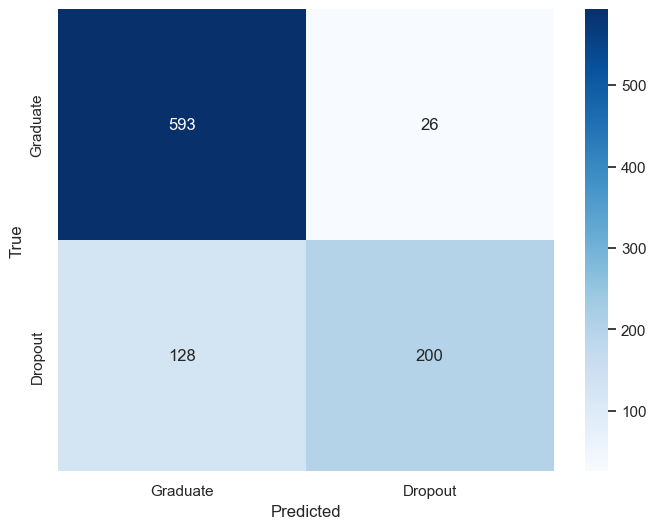

model =  LR_Ridge 	dataset =  SMOTE


accuracy after feature drop:  0.8215417106652587
Precision: 0.8874
Recall: 0.5891
F1: 0.7081


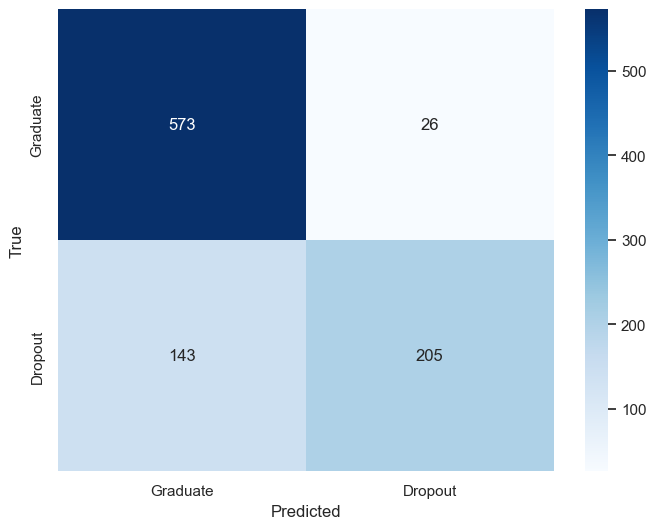

model =  LR_Ridge 	dataset =  RandomOverSampler


accuracy after feature drop:  0.8384371700105596
Precision: 0.8871
Recall: 0.6377
F1: 0.7420


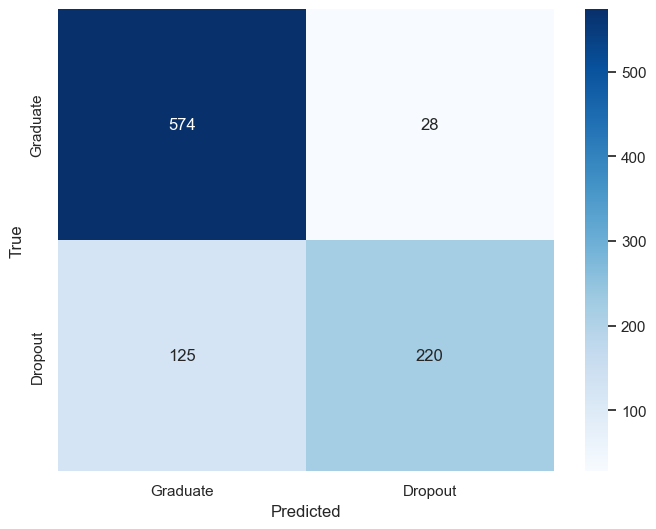

model =  LR_Ridge 	dataset =  ADASYN


accuracy after feature drop:  0.8268215417106652
Precision: 0.8957
Recall: 0.5954
F1: 0.7153


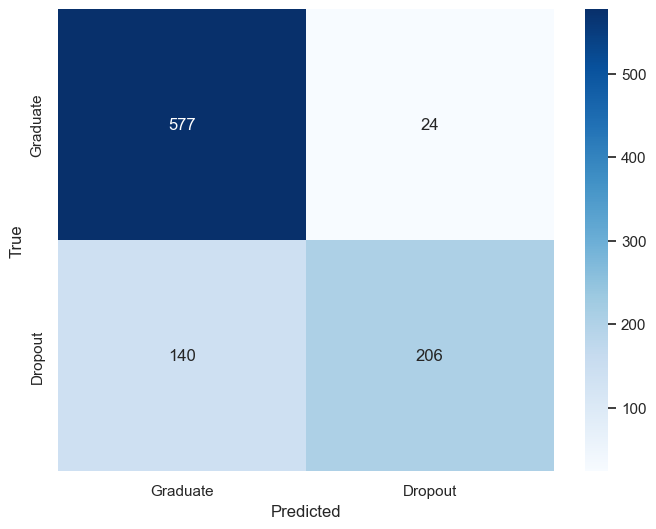

model =  LR_Ridge 	dataset =  RandomUnderSampler


accuracy after feature drop:  0.8247096092925026
Precision: 0.8734
Recall: 0.5935
F1: 0.7067


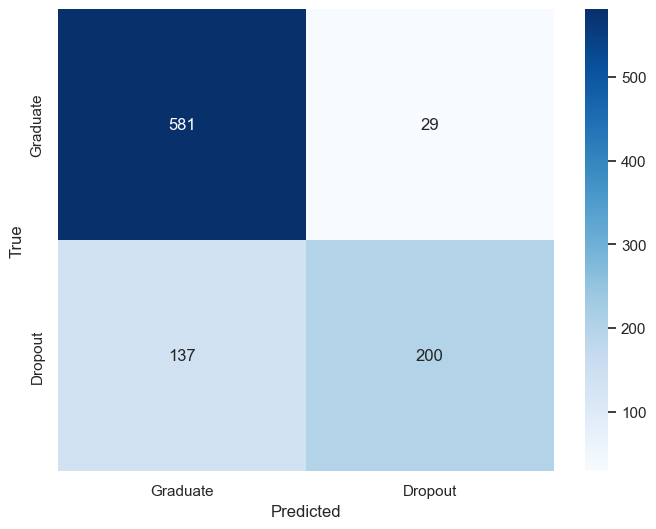

In [58]:
model_name = 'LR_Ridge'
for data in Datasets.keys():
    print('model = ', model_name, '\tdataset = ', data)
    models[model_name].loc[data, 'Accuracy'], models[model_name].loc[data, 'Precision'], models[model_name].loc[data, 'Recall'], models[model_name].loc[data, 'F1'] = Helper.logistic_regression(X, y, regression='l2', verbose=True)

## Random Forest and XGBoost—Using Correlation features

In [59]:
X = X_corr.copy()

### Random Forest

In [60]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.3)
# Creating Classifier - Random Forest
accuracy_rf = dict()
rf_models = dict()
for trees in range(2, 30):
    clf_rf = RandomForestClassifier(n_estimators=trees)
    clf_rf.fit(X_train_rf,y_train_rf)
    rf_models[trees] = clf_rf
    y_pred_rf=clf_rf.predict(X_test_rf)
    accuracy_rf[trees] = accuracy_score(y_test_rf, y_pred_rf)
accuracy_rf = dict(sorted(accuracy_rf.items(),key=(lambda x: x[1]), reverse= True))
accuracy_rf

{25: 0.8521647307286166,
 29: 0.8500527983104541,
 24: 0.8489968321013728,
 18: 0.8479408658922915,
 19: 0.8479408658922915,
 21: 0.8479408658922915,
 14: 0.8468848996832101,
 17: 0.8468848996832101,
 28: 0.8447729672650475,
 11: 0.8437170010559663,
 13: 0.8437170010559663,
 16: 0.8437170010559663,
 26: 0.8437170010559663,
 10: 0.8426610348468849,
 23: 0.8426610348468849,
 20: 0.8405491024287223,
 22: 0.839493136219641,
 27: 0.8384371700105596,
 8: 0.8352692713833157,
 9: 0.8352692713833157,
 15: 0.8352692713833157,
 7: 0.8342133051742344,
 12: 0.8331573389651531,
 5: 0.8310454065469906,
 6: 0.8310454065469906,
 2: 0.8173178458289335,
 3: 0.8162618796198522,
 4: 0.8152059134107709}

In [61]:
for model in accuracy_rf:
    y_pred_rf=rf_models[model].predict(X_test_rf)
    confusion_matrix_rf = pd.crosstab(y_test_rf, y_pred_rf, rownames=['Actual'], colnames=['Predicted'])
    print('Accuracy for i = {}: {} '.format(model, round(accuracy_score(y_test_rf, y_pred_rf), 4)))
    print(confusion_matrix_rf)

Accuracy for i = 25: 0.8522 
Predicted    0    1
Actual             
0          566   50
1           90  241
Accuracy for i = 29: 0.8501 
Predicted    0    1
Actual             
0          567   49
1           93  238
Accuracy for i = 24: 0.849 
Predicted    0    1
Actual             
0          566   50
1           93  238
Accuracy for i = 18: 0.8479 
Predicted    0    1
Actual             
0          572   44
1          100  231
Accuracy for i = 19: 0.8479 
Predicted    0    1
Actual             
0          568   48
1           96  235
Accuracy for i = 21: 0.8479 
Predicted    0    1
Actual             
0          565   51
1           93  238
Accuracy for i = 14: 0.8469 
Predicted    0    1
Actual             
0          573   43
1          102  229
Accuracy for i = 17: 0.8469 
Predicted    0    1
Actual             
0          559   57
1           88  243
Accuracy for i = 28: 0.8448 
Predicted    0    1
Actual             
0          568   48
1           99  232
Accuracy for i = 11:

although i = 14 has the best accuracy, i = 19 has a much better misclassification for our target class with almost similar accuracy, hence going ahead with no of trees = 19

Accuracy: 0.8638
Precision: 0.8522
Recall: 0.7425
F1 Score: 0.7936


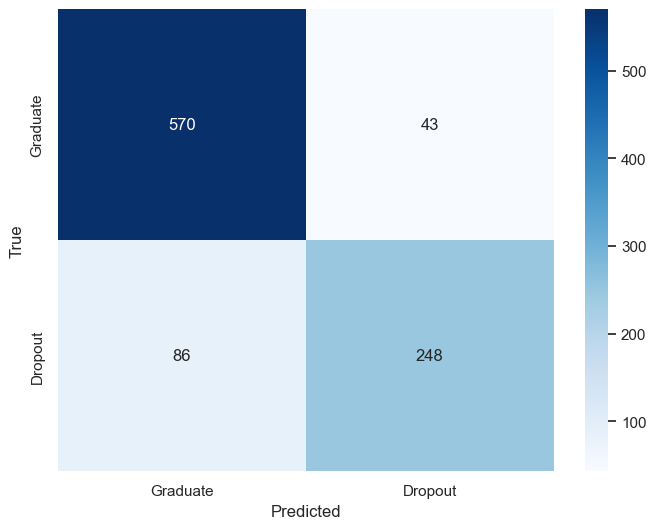

Accuracy: 0.8543
Precision: 0.8483
Recall: 0.7235
F1 Score: 0.7810


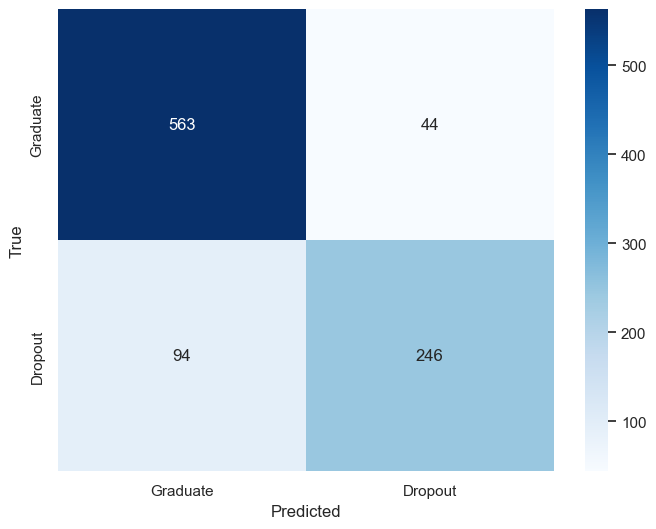

Accuracy: 0.8596
Precision: 0.8652
Recall: 0.7198
F1 Score: 0.7858


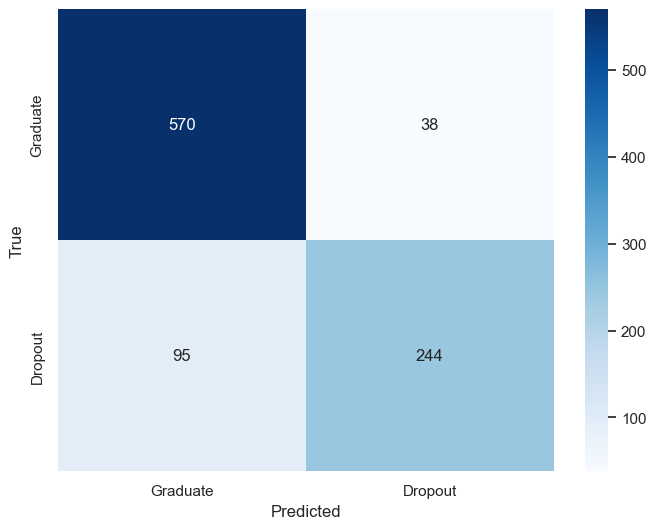

Accuracy: 0.8247
Precision: 0.8211
Recall: 0.6705
F1 Score: 0.7382


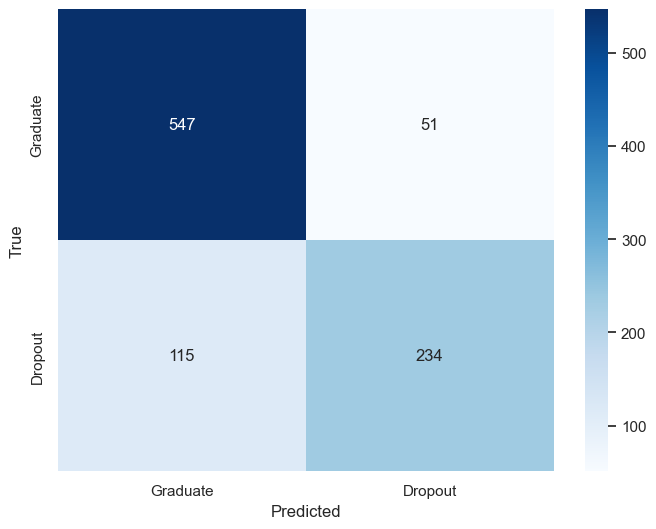

Accuracy: 0.8458
Precision: 0.8317
Recall: 0.7322
F1 Score: 0.7788


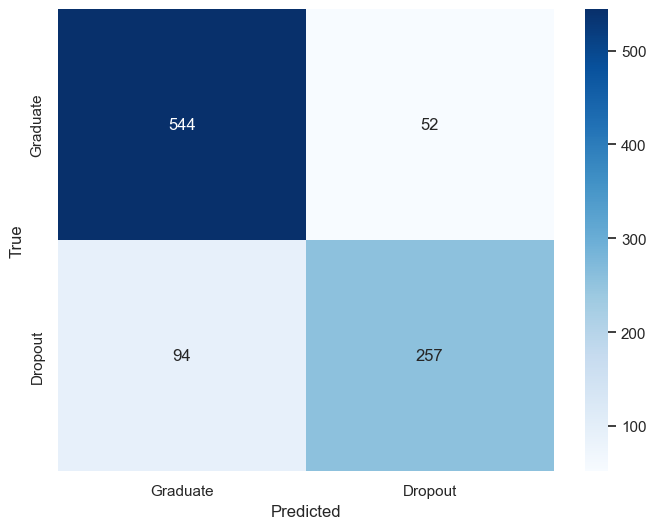

In [62]:
model_name = 'Random_Forest'
n_trees = 25
max_depth = 10
for data in Datasets.keys():
    models[model_name].loc[data, 'Accuracy'], models[model_name].loc[data, 'Precision'], models[model_name].loc[data, 'Recall'],models[model_name].loc[data, 'F1'] = Helper.random_forest(X, y, n_estimators=n_trees, max_depth=max_depth, verbose=True)

### XGBoost

In [63]:
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X, y, test_size=0.3)
# Creating Classifier - XGBoost
accuracy_xgb = dict()
xgb_models = dict()
for trees in range(2, 30):
    clf_xgb = XGBClassifier(n_estimators=trees)
    clf_xgb.fit(X_train_xgb,y_train_xgb)
    xgb_models[trees] = clf_xgb
    y_pred_xgb=clf_xgb.predict(X_test_xgb)
    accuracy_xgb[trees] = accuracy_score(y_test_xgb, y_pred_xgb)
accuracy_xgb = dict(sorted(accuracy_xgb.items(),key=(lambda x: x[1]), reverse= True))
accuracy_xgb

{14: 0.8680042238648363,
 13: 0.866948257655755,
 5: 0.8658922914466737,
 6: 0.8658922914466737,
 7: 0.8658922914466737,
 8: 0.8658922914466737,
 11: 0.8658922914466737,
 15: 0.8658922914466737,
 10: 0.8648363252375924,
 9: 0.8637803590285111,
 12: 0.8637803590285111,
 16: 0.8637803590285111,
 17: 0.8637803590285111,
 18: 0.8637803590285111,
 2: 0.8627243928194298,
 4: 0.8627243928194298,
 3: 0.8616684266103485,
 19: 0.8606124604012672,
 24: 0.8606124604012672,
 25: 0.8606124604012672,
 20: 0.8595564941921858,
 23: 0.8585005279831045,
 22: 0.8574445617740233,
 21: 0.856388595564942,
 26: 0.856388595564942,
 27: 0.856388595564942,
 28: 0.853220696937698,
 29: 0.853220696937698}

In [64]:
for model in accuracy_xgb:
    y_pred_xgb=xgb_models[model].predict(X_test_xgb)
    confusion_matrix_xgb = pd.crosstab(y_test_xgb, y_pred_xgb, rownames=['Actual'], colnames=['Predicted'])
    print('Accuracy for i = {}: {} '.format(model, round(accuracy_score(y_test_xgb, y_pred_xgb), 4)))
    print(confusion_matrix_xgb)

Accuracy for i = 14: 0.868 
Predicted    0    1
Actual             
0          557   36
1           89  265
Accuracy for i = 13: 0.8669 
Predicted    0    1
Actual             
0          557   36
1           90  264
Accuracy for i = 5: 0.8659 
Predicted    0    1
Actual             
0          561   32
1           95  259
Accuracy for i = 6: 0.8659 
Predicted    0    1
Actual             
0          558   35
1           92  262
Accuracy for i = 7: 0.8659 
Predicted    0    1
Actual             
0          558   35
1           92  262
Accuracy for i = 8: 0.8659 
Predicted    0    1
Actual             
0          558   35
1           92  262
Accuracy for i = 11: 0.8659 
Predicted    0    1
Actual             
0          556   37
1           90  264
Accuracy for i = 15: 0.8659 
Predicted    0    1
Actual             
0          556   37
1           90  264
Accuracy for i = 10: 0.8648 
Predicted    0    1
Actual             
0          556   37
1           91  263
Accuracy for i = 9: 0.86

although i = 8 has the best accuracy, i = 12 has a much better misclassification for our target class with slightly lower accuracy, hence going ahead with a no of trees = 12

model =  XGBoost 	dataset =  Unbalanced
Accuracy: 0.8564
Precision: 0.8478
Recall: 0.7270
F1 Score: 0.7827


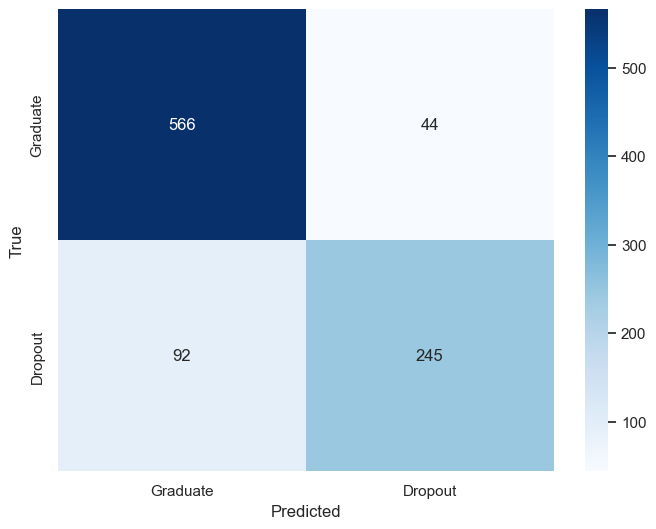

model =  XGBoost 	dataset =  SMOTE
Accuracy: 0.8469
Precision: 0.8426
Recall: 0.7439
F1 Score: 0.7902


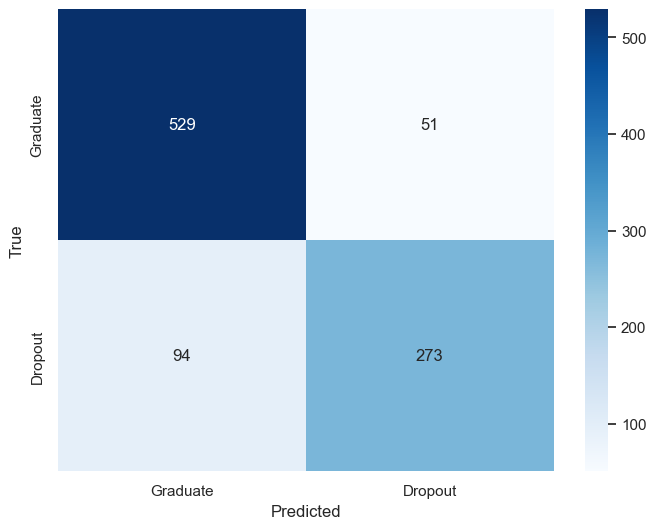

model =  XGBoost 	dataset =  RandomOverSampler
Accuracy: 0.8564
Precision: 0.8469
Recall: 0.7570
F1 Score: 0.7994


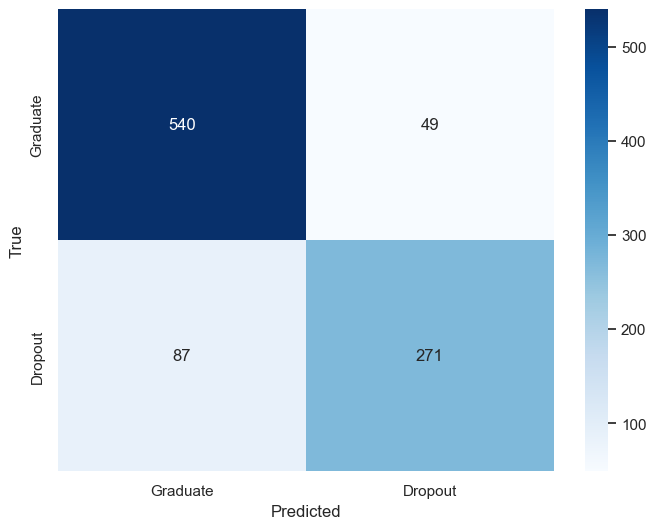

model =  XGBoost 	dataset =  ADASYN
Accuracy: 0.8501
Precision: 0.8713
Recall: 0.7193
F1 Score: 0.7881


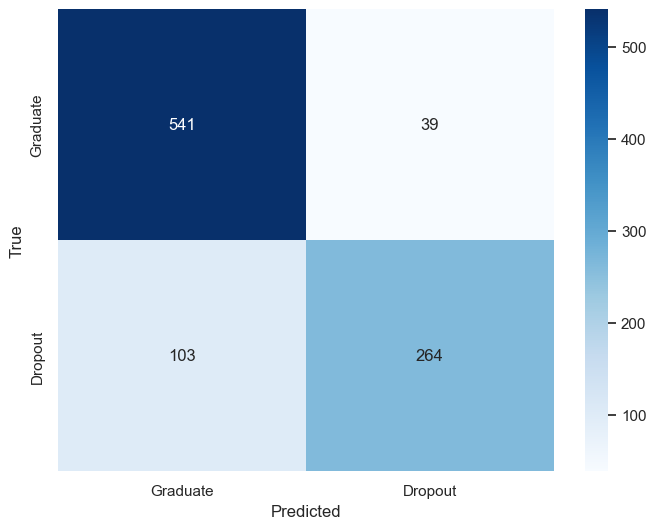

model =  XGBoost 	dataset =  RandomUnderSampler
Accuracy: 0.8479
Precision: 0.8388
Recall: 0.7286
F1 Score: 0.7798


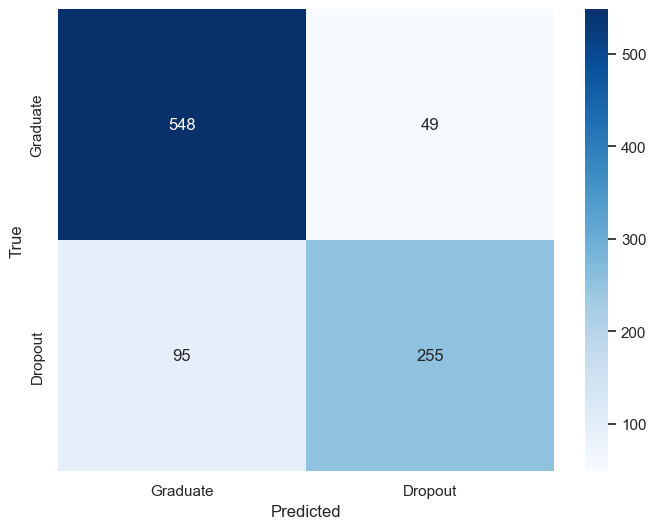

In [65]:
model_name = 'XGBoost'
n_trees = 14
max_depth = 10
for data in Datasets.keys():
    print('model = ', model_name, '\tdataset = ', data)
    models[model_name].loc[data, 'Accuracy'], models[model_name].loc[data, 'Precision'], models[model_name].loc[data, 'Recall'],models[model_name].loc[data, 'F1'] = Helper.random_forest(X, y, n_estimators=n_trees, max_depth=max_depth, verbose=True)

## Random Forest and XGBoost—Using RFE Features

In [66]:
X = X_ridge.copy()

### Random Forest

In [67]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.3)
# Creating Classifier - Random Forest
accuracy_rf = dict()
rf_models = dict()
for trees in range(2, 30):
    clf_rf = RandomForestClassifier(n_estimators=trees)
    clf_rf.fit(X_train_rf,y_train_rf)
    rf_models[trees] = clf_rf
    y_pred_rf=clf_rf.predict(X_test_rf)
    accuracy_rf[trees] = accuracy_score(y_test_rf, y_pred_rf)
accuracy_rf = dict(sorted(accuracy_rf.items(),key=(lambda x: x[1]), reverse= True))
accuracy_rf

{14: 0.8152059134107709,
 3: 0.8141499472016895,
 4: 0.8141499472016895,
 5: 0.8141499472016895,
 19: 0.8130939809926082,
 2: 0.8109820485744457,
 10: 0.8109820485744457,
 26: 0.8099260823653643,
 8: 0.808870116156283,
 12: 0.808870116156283,
 27: 0.808870116156283,
 6: 0.8078141499472017,
 7: 0.8078141499472017,
 15: 0.8078141499472017,
 23: 0.8078141499472017,
 13: 0.8067581837381204,
 17: 0.8067581837381204,
 20: 0.8067581837381204,
 18: 0.805702217529039,
 11: 0.8046462513199577,
 22: 0.8046462513199577,
 25: 0.8046462513199577,
 29: 0.8046462513199577,
 9: 0.8035902851108765,
 21: 0.8035902851108765,
 24: 0.8035902851108765,
 28: 0.8025343189017952,
 16: 0.8014783526927138}

In [68]:
for model in accuracy_rf:
    y_pred_rf=rf_models[model].predict(X_test_rf)
    confusion_matrix_rf = pd.crosstab(y_test_rf, y_pred_rf, rownames=['Actual'], colnames=['Predicted'])
    print('Accuracy for i = {}: {} '.format(model, round(accuracy_score(y_test_rf, y_pred_rf), 4)))
    print(confusion_matrix_rf)

Accuracy for i = 14: 0.8152 
Predicted    0    1
Actual             
0          517   74
1          101  255
Accuracy for i = 3: 0.8141 
Predicted    0    1
Actual             
0          524   67
1          109  247
Accuracy for i = 4: 0.8141 
Predicted    0    1
Actual             
0          526   65
1          111  245
Accuracy for i = 5: 0.8141 
Predicted    0    1
Actual             
0          517   74
1          102  254
Accuracy for i = 19: 0.8131 
Predicted    0    1
Actual             
0          518   73
1          104  252
Accuracy for i = 2: 0.811 
Predicted    0    1
Actual             
0          529   62
1          117  239
Accuracy for i = 10: 0.811 
Predicted    0    1
Actual             
0          515   76
1          103  253
Accuracy for i = 26: 0.8099 
Predicted    0    1
Actual             
0          510   81
1           99  257
Accuracy for i = 8: 0.8089 
Predicted    0    1
Actual             
0          512   79
1          102  254
Accuracy for i = 12: 0.808

although i = 2 has the best accuracy, i = 3 has a much better misclassification for our target class with slightly lower accuracy, hence going ahead with no of trees = 3

model =  Random_Forest 	dataset =  Unbalanced
Accuracy: 0.8427
Precision: 0.8142
Recall: 0.7472
F1 Score: 0.7793


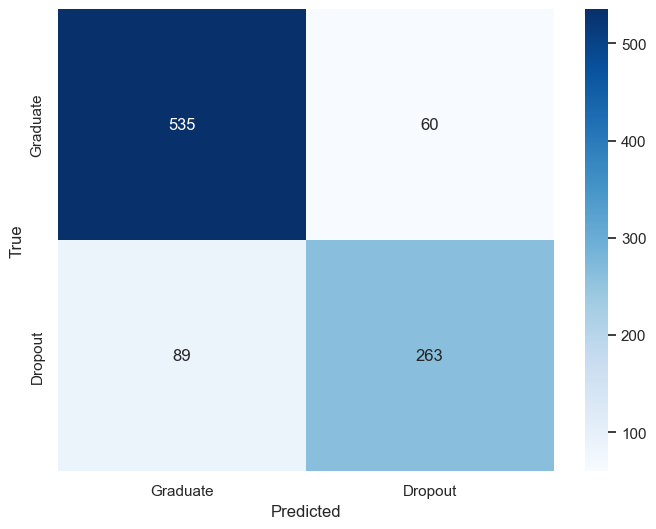

model =  Random_Forest 	dataset =  SMOTE
Accuracy: 0.8363
Precision: 0.8813
Recall: 0.6676
F1 Score: 0.7597


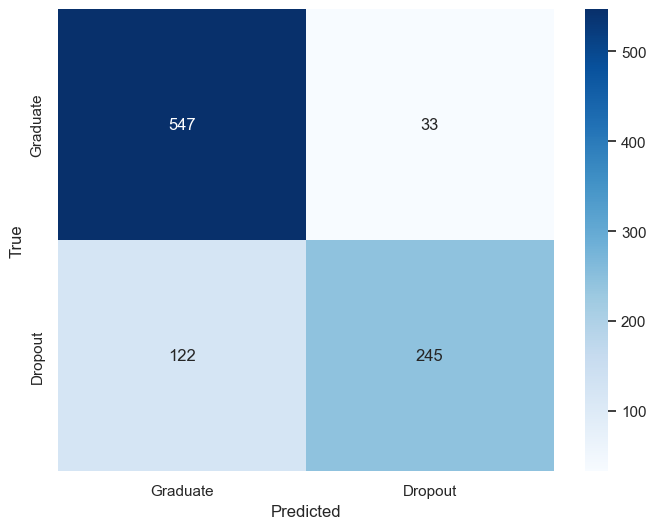

model =  Random_Forest 	dataset =  RandomOverSampler
Accuracy: 0.8458
Precision: 0.8521
Recall: 0.6994
F1 Score: 0.7683


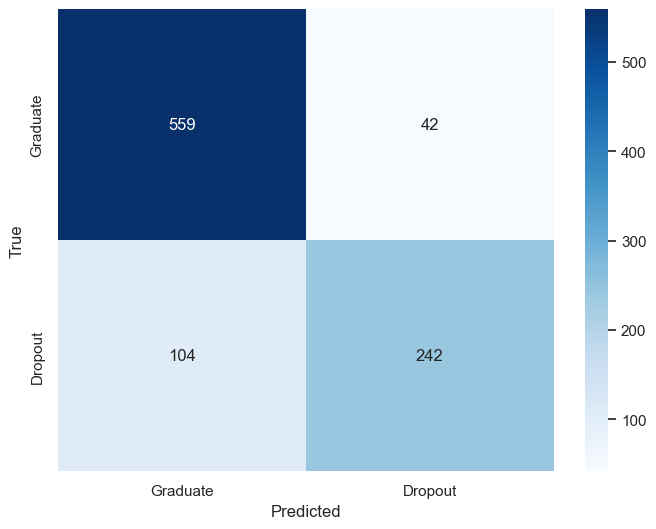

model =  Random_Forest 	dataset =  ADASYN
Accuracy: 0.8300
Precision: 0.8153
Recall: 0.6842
F1 Score: 0.7440


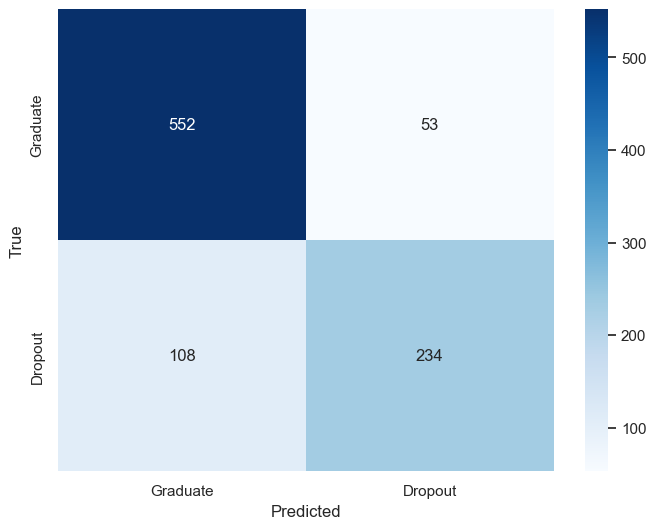

model =  Random_Forest 	dataset =  RandomUnderSampler
Accuracy: 0.8247
Precision: 0.8025
Recall: 0.7079
F1 Score: 0.7522


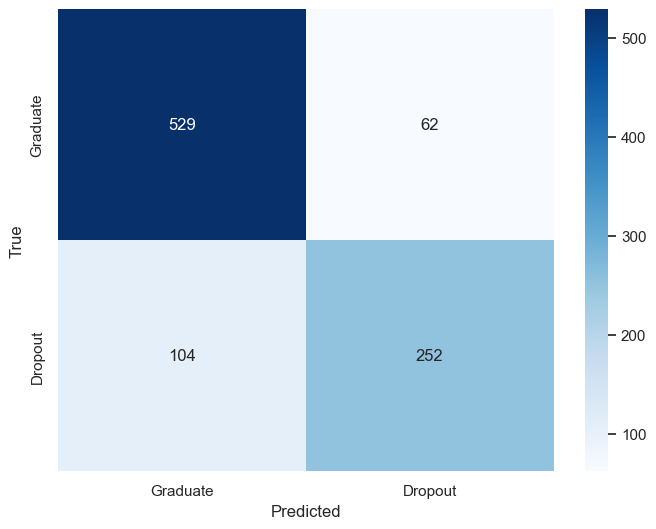

In [69]:
model_name = 'Random_Forest'
n_trees = 14
max_depth = 10
for data in Datasets.keys():
    print('model = ', model_name, '\tdataset = ', data)
    models_rfe[model_name].loc[data, 'Accuracy'], models_rfe[model_name].loc[data, 'Precision'], models_rfe[model_name].loc[data, 'Recall'],models_rfe[model_name].loc[data, 'F1'] = Helper.random_forest(X, y, n_estimators=n_trees, max_depth=max_depth, verbose=True)

### XGBoost

In [70]:
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X, y, test_size=0.3)
# Creating Classifier - XGBoost
accuracy_xgb = dict()
xgb_models = dict()
for trees in range(2, 30):
    clf_xgb = XGBClassifier(n_estimators=trees)
    clf_xgb.fit(X_train_xgb,y_train_xgb)
    xgb_models[trees] = clf_xgb
    y_pred_xgb=clf_xgb.predict(X_test_xgb)
    accuracy_xgb[trees] = accuracy_score(y_test_xgb, y_pred_xgb)
accuracy_xgb = dict(sorted(accuracy_xgb.items(),key=(lambda x: x[1]), reverse= True))
accuracy_xgb

{2: 0.8606124604012672,
 18: 0.8606124604012672,
 19: 0.8606124604012672,
 20: 0.8606124604012672,
 21: 0.8606124604012672,
 22: 0.8606124604012672,
 3: 0.8595564941921858,
 23: 0.8595564941921858,
 24: 0.8595564941921858,
 25: 0.8595564941921858,
 26: 0.8595564941921858,
 27: 0.8595564941921858,
 28: 0.8595564941921858,
 29: 0.8595564941921858,
 6: 0.8553326293558606,
 11: 0.8553326293558606,
 14: 0.8553326293558606,
 17: 0.8553326293558606,
 5: 0.8542766631467793,
 7: 0.8542766631467793,
 8: 0.8542766631467793,
 16: 0.8542766631467793,
 15: 0.853220696937698,
 12: 0.8511087645195353,
 13: 0.8511087645195353,
 4: 0.8500527983104541,
 9: 0.8489968321013728,
 10: 0.8489968321013728}

In [71]:
for model in accuracy_xgb:
    y_pred_xgb=xgb_models[model].predict(X_test_xgb)
    confusion_matrix_xgb = pd.crosstab(y_test_xgb, y_pred_xgb, rownames=['Actual'], colnames=['Predicted'])
    print('Accuracy for i = {}: {} '.format(model, round(accuracy_score(y_test_xgb, y_pred_xgb), 4)))
    print(confusion_matrix_xgb)

Accuracy for i = 2: 0.8606 
Predicted    0    1
Actual             
0          587   26
1          106  228
Accuracy for i = 18: 0.8606 
Predicted    0    1
Actual             
0          565   48
1           84  250
Accuracy for i = 19: 0.8606 
Predicted    0    1
Actual             
0          565   48
1           84  250
Accuracy for i = 20: 0.8606 
Predicted    0    1
Actual             
0          564   49
1           83  251
Accuracy for i = 21: 0.8606 
Predicted    0    1
Actual             
0          564   49
1           83  251
Accuracy for i = 22: 0.8606 
Predicted    0    1
Actual             
0          564   49
1           83  251
Accuracy for i = 3: 0.8596 
Predicted    0    1
Actual             
0          579   34
1           99  235
Accuracy for i = 23: 0.8596 
Predicted    0    1
Actual             
0          564   49
1           84  250
Accuracy for i = 24: 0.8596 
Predicted    0    1
Actual             
0          564   49
1           84  250
Accuracy for i = 25: 

although i = 9 has the best accuracy, i = 14 has a much better misclassification for our target class with slightly lower accuracy, hence going ahead with no of trees = 14

model =  XGBoost 	dataset =  Unbalanced
Accuracy: 0.8532
Precision: 0.8648
Recall: 0.7064
F1 Score: 0.7776


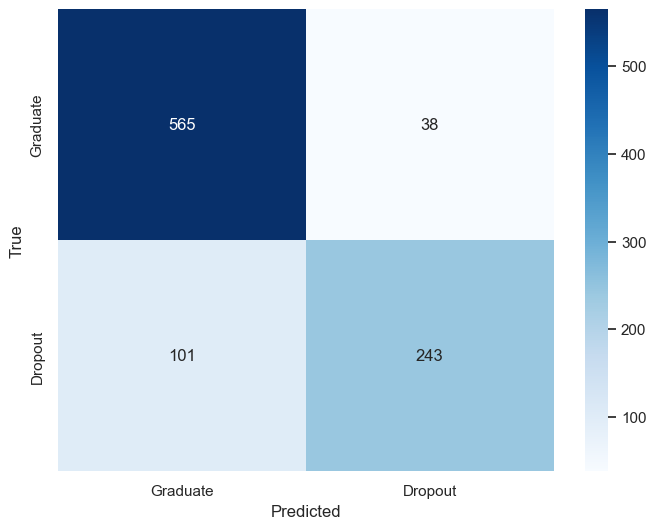

model =  XGBoost 	dataset =  SMOTE
Accuracy: 0.8416
Precision: 0.8267
Recall: 0.7168
F1 Score: 0.7678


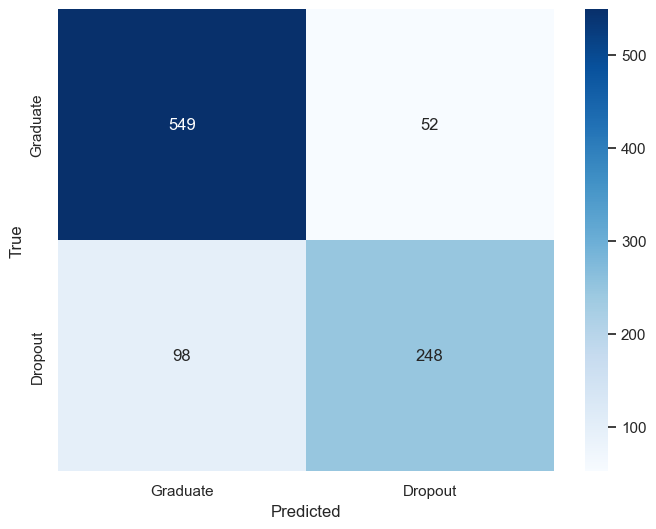

model =  XGBoost 	dataset =  RandomOverSampler
Accuracy: 0.8395
Precision: 0.8278
Recall: 0.7143
F1 Score: 0.7669


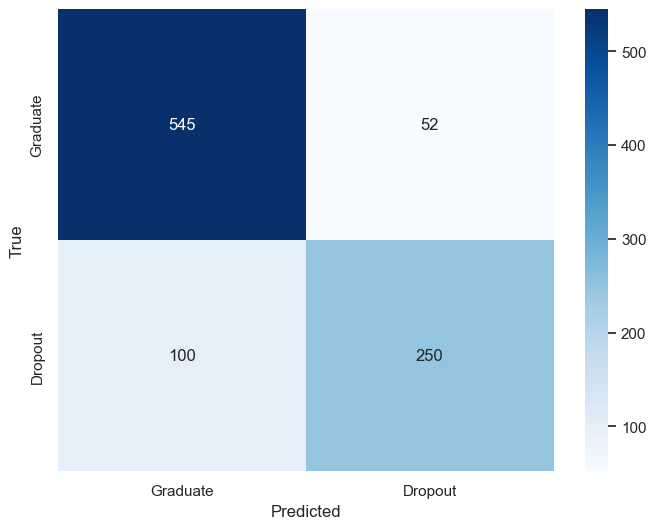

model =  XGBoost 	dataset =  ADASYN
Accuracy: 0.8427
Precision: 0.8386
Recall: 0.6988
F1 Score: 0.7624


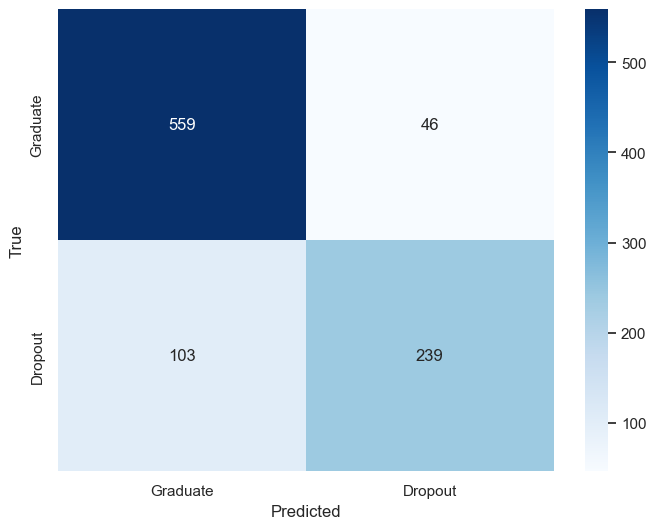

model =  XGBoost 	dataset =  RandomUnderSampler
Accuracy: 0.8479
Precision: 0.8551
Recall: 0.7014
F1 Score: 0.7707


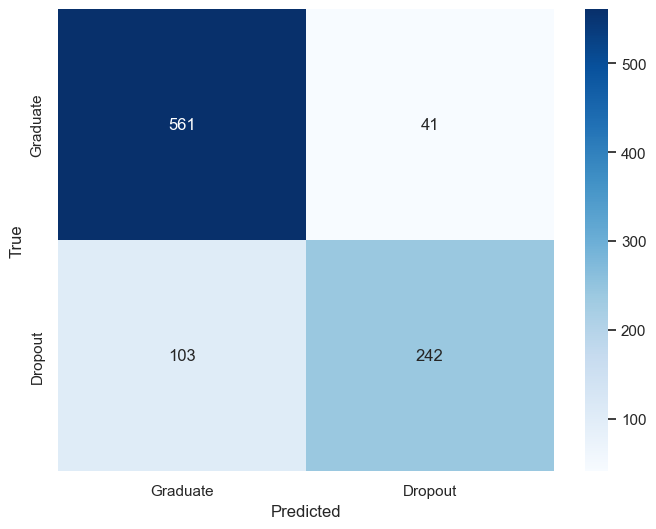

In [72]:
model_name = 'XGBoost'
n_trees = 20
max_depth = 10
for data in Datasets.keys():
    print('model = ', model_name, '\tdataset = ', data)
    models_rfe[model_name].loc[data, 'Accuracy'], models_rfe[model_name].loc[data, 'Precision'], models_rfe[model_name].loc[data, 'Recall'],models_rfe[model_name].loc[data, 'F1'] = Helper.random_forest(X, y, n_estimators=n_trees, max_depth=max_depth, verbose=True)

## Comparing Models

### Logistic Regression - Lasso

In [73]:
models['LR_lasso'].sort_values(by=['F1','Accuracy'], ascending=False)

,Accuracy,Precision,Recall,F1
RandomOverSampler,0.864836,0.865517,0.738235,0.796825
RandomUnderSampler,0.843717,0.880597,0.670455,0.761290
SMOTE,0.837381,0.873188,0.669444,0.757862
ADASYN,0.833157,0.838710,0.674352,0.747604
Unbalanced,0.841605,0.830769,0.670807,0.742268


The above results are for logistic regression with lasso penalty, using the feature set selected by the correlation matrix. From this result we can see that although the 'Random Over Sampler' dataset provides a better accuracy, the 'ASASYN' dataset provides a similar accuracy with a greater recall, meaning that it has a lower number of misclassifications for 'Dropout' cases, which is important for our use case.

In [74]:
models_rfe['LR_lasso'].sort_values(by=['F1','Accuracy'], ascending=False)

,Accuracy,Precision,Recall,F1
RandomUnderSampler,0.848997,0.931034,0.660326,0.772655
RandomOverSampler,0.843717,0.901639,0.639535,0.748299
Unbalanced,0.843717,0.897119,0.639296,0.746575
ADASYN,0.822598,0.893130,0.625668,0.735849
SMOTE,0.823654,0.877637,0.601156,0.713551


The above results are for logistic regression with lasso penalty, using the feature set selected by RFE method. From this result, we can see that the 'Random Over Sampler' dataset provides a better accuracy, as well as recall.

### Logistic Regression - Ridge

In [75]:
models['LR_Ridge'].sort_values(by=['F1','Accuracy'], ascending=False)

,Accuracy,Precision,Recall,F1
RandomOverSampler,0.838437,0.887097,0.637681,0.741990
Unbalanced,0.837381,0.884956,0.609756,0.722022
ADASYN,0.826822,0.895652,0.595376,0.715278
SMOTE,0.821542,0.887446,0.589080,0.708117
RandomUnderSampler,0.824710,0.873362,0.593472,0.706714


The above results are for logistic regression with ridge penalty, using the feature set selected by the correlation matrix. From this result, we can see that although the 'Random Over Sampler' dataset provides a better F1 score, the 'ASASYN' dataset provides a similar F1 score with a greater recall.

In [76]:
models_rfe['LR_Ridge'].sort_values(by=['F1','Accuracy'], ascending=False)

,Accuracy,Precision,Recall,F1
ADASYN,0.845829,0.906137,0.676550,0.774691
SMOTE,0.845829,0.862191,0.695157,0.769716
RandomUnderSampler,0.842661,0.854406,0.667665,0.749580
Unbalanced,0.840549,0.857143,0.652568,0.740995
RandomOverSampler,0.822598,0.855072,0.648352,0.737500


The above results are for logistic regression with ridge penalty, using the feature set selected by RFE method. From this result, we can see that the 'ADASYN' dataset provides the best results in all evaluation parameters.

### Random Forest

In [77]:
models['Random_Forest'].sort_values(by=['F1','Accuracy'], ascending=False)

,Accuracy,Precision,Recall,F1
Unbalanced,0.863780,0.852234,0.742515,0.793600
RandomOverSampler,0.859556,0.865248,0.719764,0.785829
SMOTE,0.854277,0.848276,0.723529,0.780952
RandomUnderSampler,0.845829,0.831715,0.732194,0.778788
ADASYN,0.824710,0.821053,0.670487,0.738170


Looking at this result, we can see a significant improvement as compared to the logistic regression models. The above results are for random forests, using the feature set selected by the correlation matrix. From this result, we can see that although the 'Random Over Sampler' dataset provides a better F1 score, the 'Unbalanced' dataset provides a similar F1 score with greater recall and accuracy. This is the best model of all the models that we have tried.

In [78]:
models_rfe['Random_Forest'].sort_values(by=['F1','Accuracy'], ascending=False)

,Accuracy,Precision,Recall,F1
Unbalanced,0.842661,0.814241,0.747159,0.779259
RandomOverSampler,0.845829,0.852113,0.699422,0.768254
SMOTE,0.836325,0.881295,0.667575,0.759690
RandomUnderSampler,0.824710,0.802548,0.707865,0.752239
ADASYN,0.829989,0.815331,0.684211,0.744038


The above results are for random forests, using the feature set selected by RFE method. From this result, we can see that the 'SMOTE' dataset comes out on the top in all the evaluation parameters

### XGBoost

In [79]:
models['XGBoost'].sort_values(by=['F1','Accuracy'], ascending=False)

,Accuracy,Precision,Recall,F1
RandomOverSampler,0.856389,0.846875,0.756983,0.799410
SMOTE,0.846885,0.842593,0.743869,0.790159
ADASYN,0.850053,0.871287,0.719346,0.788060
Unbalanced,0.856389,0.847751,0.727003,0.782748
RandomUnderSampler,0.847941,0.838816,0.728571,0.779817


Looking at this result, we don't see any significant improvement as compared to the random forest models. The above results is for xgboost, using the feature set selected by the correlation matrix. From this result, we can see that the 'ADASYN' dataset provides a better F1 score, and recall along with accuracy which is very close to the 'SMOTE' dataset.

In [80]:
models_rfe['XGBoost'].sort_values(by=['F1','Accuracy'], ascending=False)

,Accuracy,Precision,Recall,F1
Unbalanced,0.853221,0.864769,0.706395,0.777600
RandomUnderSampler,0.847941,0.855124,0.701449,0.770701
SMOTE,0.841605,0.826667,0.716763,0.767802
RandomOverSampler,0.839493,0.827815,0.714286,0.766871
ADASYN,0.842661,0.838596,0.698830,0.762360


 The above results are for xgboost, using the feature set selected by RFE method. From this result, we can see that the 'SMOTE' dataset provides a better F1 score, recall and accuracy as compared to other datasets.

## Conclusion

Looking at the above results we can conclude a few things:
1. We expected balanced datasets to outperform unbalanced datasets, but there was no significant difference and the best model that we got was for an unbalanced dataset.
2. Contrary to our expectations, the boosting method did not provide any significant improvement. Their results were at par with random forest, with random forest performing slightly better.
3. Random forest models consistently outperformed both l1 and l2 logistic regression models which was consistent with our expectations.
4. Although at first glance, logistic regression models had a very good accuracy, at par with random forest, there was a huge imbalance in the precision and recall. They had very good precision with poor recall, which is not beneficial for our use case.
5. Apart from Ridge logistic regression, for all other methods, the correlation matrix feature selection method provided better results as compared to 'Recursive Forward Elimination'.